# INFO 2950 Final Project 

## __Fund Investment Decisions: Mutual Funds or Exchange Traded Funds?__

By Cameron Robinson (ctr48) , David Vilensky (dlv46) , Cassandra Kaufman (cpk57) , and Emily Sobel (es983)

## Introduction

A central pillar of the global economy is _investment_: the process of sacrificing present assets in order to get returns on those assets in the future. There are many different types of investments and investing can be dated all the way back to the 16th century. Hundreds of years later a strategy of investment emerged  in 18th century France: the idea of pooling assets together from various sources with the intent of collectively investing. 

These investment funds first emerged in the United States in the form of __Mutual Funds__, funds that are actively managed by a fund manager who uses the assets within the fund to generate returns for the fund shareholders. Because these funds need management in order to generate returns, there is a fee involved in joining them. The fund investment vehicle that later emerged to challenge Mutual Funds are __Exchange Traded Funds or ETFs__. In direct contrast with Mutual Funds, ETFs are passively managed -- they track a specific market index. With ETFs, investors hope to capture the returns of the market on the whole, and not waste the resources required to actively manage a fund.       

The question of whether the active management style of Mutual Funds can outperform the market and the passive investment style of ETFs has been debated by investors and the answer still remains unclear. In our project we identified the aspects of each fund that are most correlated with fund returns for each type of fund. We then went through our dataset to determine which funds had above average returns and attempted to predict above average returns or not based on each fund's most correlated variables. In the end we found that ETFs have extremely high predictive accuracy based on the fund descriptors that would be available to investors at the time of investing and Mutual Funds have poor predictive accuracy when trying to predict if a Mutual Fund will have above average returns. 
   
On top of this predictive analysis, we analyzed the investment types of each fund and how that affected fund return. Growth funds have extremely high returns in short time frames, and growth ETFs are significantly better than growth Mutual Funds. Value funds emerge with high total returns in a very long investing period, and once again we found value ETFs were superior to value Mutual Funds.

These key insights gained lead us to the conclusion that the active management style of Mutual Funds proves to be inferior to the passive management of ETFs. ETFs dominate Mutual Funds in all investment types and across all time frames, as well as having extremely high predictive accuracy with fund descriptors. Mutual Funds are more unpredictable and have more factors attributing to their success, causing them to be hard to predict and not nearly as reliable as Mutual Funds. 


-----------------------------------------------------------------------------------------------
 

#### __Research Question:__

What set of criteria is most important to the sucess of a mutual fund? What about amongst ETFs? Which type of fund is more successful overall can can the success of a fund be accurately predicted based on these observed criteria?

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Importing

In [1]:
# imports and settings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import re

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

## Data Overview



The file contains 24,821 Mutual Funds and 1,680 ETFs with general aspects (as Total Net Assets, management company and size), portfolio indicators (as cash, stocks, bonds, and sectors), returns (as yeartodate, 2020-11) and financial ratios (as price/earning, Treynor and Sharpe ratios, alpha, and beta). This data was scraped from Yahoo Finance by kaggle user Stefano Leone.

Link to dataset: https://www.kaggle.com/stefanoleone992/mutual-funds-and-etfs


## Data Description

The two datasets used were created to allow for multiple comparisons regarding portfolio decisions from investment managers in Mutual Funds and portfolio restrictions to the indexes in Exchnage traded funds. Each of the datasets are composed of publicly available information and were not funded by any companies or private organizations. The instances in each of the datasets are  funds with the respective fund type, either Exchange traded funds in the ETF.csv or Mutual funds in the Mutual Funds.csv. The columns in each of the datasets contain information on the respective fund's financial ratios, sector investments, risk ratios, and returns. The data in each of the datasets was collected over a time period between 2011 and 2020. The original datasets don't have any errors but they do contain null information in the form of empty columns that were dropped during our data cleaning. This preprocessing and all other preprocessing of the data found in the two datasets is extensively documented in our data cleaning section and we have made no additional modifications or alterations to the data. The creator of the datasets placed no copyrights or restrictions on their use and under its license of CC0: Public Domain, we have permission to access and use its both of the datsets content for our project. 
 

*The remainder of the Data Description is located at the bottom of the jupyter file due to the length 

## Data Limitations

One of the most prominent data limitations that we had to deal with during our analysis was the prevalence of the ‘NaN’ or empty values in columns. These values in columns were useless and in most cases would give us a problem when calculating our analysis, for you cannot use most of our functions with ‘Nan’ as the input when it is expecting something like a number. To solve this problem, we dropped ‘Nan’ values or empty values. When we went through the columns to find these values and drop them, every single value in the same row of this ‘NaN’ value that was dropped would be dropped as well for every column. These values in the other rows that were dropped because of the ‘Nan’ value were actually pieces of data that we could have used. Unfortunately, they had to be dropped because of this ‘Nan’ value. This happened relatively frequently because the dataset had a lot of these ‘Nan’ values, so we lost a decent amount of data as a result of dropping these values. That is one limitation that we had to combat during our analysis. 

Another data limitation that we encountered during this project was that the Mutual Fund Data set was more complete than the ETF dataset. What this means is that the Mutual Fund data set was not only bigger than the ETF dataset, but it had values that the ETF data set did not have. Since the ETF dataset did not have some of the values that the Mutual Fund data set had, we could not compare these values between the two data sets. This limited us to exploring certain areas of Mutual Funds and then comparing them because we would have nothing to compare it to. Some of these variables were very interesting, but unfortunately we were not able to compare the two. 
 

## Loading Data from CSV Files (see Cleaning Appendix for more details on how we manipulated and cleaned the original Kaggle DataSet)

In [2]:
df_mf=pd.read_csv('df_mf.csv')
df_etf=pd.read_csv('df_etf.csv')

df_mf2=pd.read_csv('preliminaryMF.csv')
df_etf2=pd.read_csv('preliminaryETF.csv')

df_mf3=pd.read_csv('preliminaryMF.csv')
df_etf3=pd.read_csv('preliminaryETF.csv')

df_mf_ratios=pd.read_csv('mf_ratios.csv')
df_etf_ratios=pd.read_csv('etf_ratios.csv')

df_mf_sector=pd.read_csv('mf_sectors.csv')
df_etf_sector=pd.read_csv('etf_sectors.csv')

df_mf_asset=pd.read_csv('mf_assets.csv')
df_etf_asset=pd.read_csv('etf_assets.csv')

df_mf_return_history=pd.read_csv('mf_returns.csv')
df_etf_return_history=pd.read_csv('etf_returns.csv')



In [3]:
### Creates and returns a subset of df_mf by keeping only the columns with 'keyword' in their column name. 
def cleanbykeyword(df,keyword):
    """
    Searches and creates a list of all of the column names in df that contain the keyword.
    Subsets the df according to this list, then creates a df_new dataframe with this 
    information and drops the corresponding columns from the original df.

    Arguments:
        df: Dataset pandas DataFrame.
        cols: List of columns to be included in calculations. 
        keyword: Word to be removed from column name in order to preserve clarity with labeling.
        
        
    Return: dataframe containing data matching keyword.
    """
    col_list=[ i for i in df.columns if (keyword in i)] 
    #print(col_list)
    df_new=df[col_list]
    df.drop(columns=col_list,axis=1,inplace=True) #removes duplicate data from df_mf masterframe
    df_new.insert(0,'fund_symbol',df.fund_symbol) #inserts the fund symbols as the 1st column of the new data set
    return (df_new)

Transforms treynor ratio columns to floats and saves partially cleaned dataframes for more efficient use in the future. 

In [4]:
def greater_than(df,parameter):
    '''
    Use:
    Determines whether the return in a certain time frame is above thhe category average
    
    Arguments:
    df: DataFrame containing both fund and categorical return data
    parameter: Timeframe to compare return data in
    '''
    cat="category_return_"+ parameter
    fund="fund_return_" + parameter
    newcol=">average_" +parameter
    
    cat_idx= df.columns.get_loc(cat)
    fund_idx= df.columns.get_loc(fund)
    
    greater_list = []
    for i in range(df.shape[0]):
        if(df.iloc[i,fund_idx]>df.iloc[i,cat_idx] ):
            greater_list.append(1)
        else:
            greater_list.append(0)
    df[newcol]=greater_list

In [5]:
def str_to_float(df,column):

        
    '''
    This method converts the values of a specific column in a given dataframe from strings to floats\n",
    '''
    list=[]
    col_id=df.columns.get_loc(column)
    for i in range(df.shape[0]):
        treynor=df.iloc[i,col_id]
        if type(treynor) == None:
            list.append(-100)
        if type(treynor) != None:
            if type(treynor) == str:
                treynor = treynor.replace(',','')
            f=float(treynor)
            list.append(f)
    return(list)


   


In [6]:
#Fills none types with the average value
#I designed the str_to_float method to assign -100 for missing Treynor ratios so they could be exclded from calculations. This way we avoid dropping the 
def fill_with_mean(df,column):
    '''
    Use:
    This method is an addendum to the str_to_float method. A lot of the 
    Fills the specified column in df with 
    '''
    col_id=df.columns.get_loc(column)
    mean=df[df[column]>-80][column].mean()
    for i in range(df.shape[0]):
        treynor=df.iloc[i,col_id]
        if treynor < -50:
            df.iloc[i,col_id]=mean           
    return

# Methods Used Section

Methods used for data exploration:

In [7]:
#creates two pie charts representing the relative distribution of funds in a certain category for both fund types
def comparison_pies(df1,df2,column,t1,t2):
    '''
    Creates two pie charts representing the relative distribution of funds in a certain category for both fund types
    
    Arguments:
        df: Pandas dataframe
        df2: Pandas dataframe
        column: column in df that is to be analyzed.
        t1:Title of pie chart 1 
        t2: Title of pie chart 2
        
    '''
    y=df1.groupby(column).fund_symbol.count()
    x=df2.groupby(column).fund_symbol.count()

    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.pie(y,labels=y.index.to_numpy(),autopct='%.2f%%')
    ax2.pie(x,labels=x.index.to_numpy(),autopct='%.2f%%')
    
    ax1.set_title (t1)
    ax2.set_title(t2)
    plt.tight_layout()

In [8]:
#creates a pie chart representing the relative distribution of funds in a certain category 
def pie_chart(df,column):
    '''
    Creates a pie chart representing the relative distribution of funds in a certain category 
    
    Arguments:
        df: Pandas dataframe
        column: column in df that is to be analyzed.
    '''
    grouped=df.groupby(column).fund_symbol.count().to_frame()
    plt.pie(grouped.fund_symbol,labels=grouped.index,autopct='%.2f%%')
    plt.show()


In [9]:
#creates a pie chart representing the % composition of a certain range of values in a dataset.
def multiple_percent_comp_bar(df,df2,cols,cols2,keyword,t1,t2):
    """
    Creates two pie charts for two given DataFrame subsets. Each section in the pie chart
    represents a column mean within the dataframe, which corresponds to a % invested
    in a given category (sector/asset)
    
    Arguments:
        df: Dataset pandas DataFrame.
        df2: Dataset pandas DataFrame.
        cols: List (corresponding to df) of columns to be included in calculations. 
        cols2: Second List (corresponding to df2) of columns to be included in calculations. 
        keyword: Word to be removed from column name in order to preserve clarity with labeling.
        t1: Title of the first pie chart 
        t2: Title of the second pie chart
    """
    
    
    fig, (ax1, ax2) = plt.subplots(1,2)
        
        
    col_names=[]
    other=0
    col_sums=[]
    for column in cols:
        col_sum=df[column].mean()
        if(col_sum<1 or 'other' in column):
            other+=col_sum
        else:
            col_names.append(column.replace(keyword,''))
            col_sums.append(df[column].mean())
    if(other>0.1):
        col_names.append('other')
        col_sums.append(other)
    ax1.pie(col_sums,labels=col_names,autopct='%.2f%%') 
    ax1.set_title (t1)
   

    
    col_names2=[]
    other2=0
    col_sums2=[]
    for column in cols2:
        col_sum=df2[column].mean()
        if(col_sum<1 or 'other' in column):
            other+=col_sum
        else:
            col_names2.append(column.replace(keyword,''))
            col_sums2.append(df2[column].mean())
    if(other>0.1):
        col_names2.append('other')
        col_sums2.append(other)
    ax2.pie(col_sums2,labels=col_names2,autopct='%.2f%%') 
    ax2.set_title (t2)

    plt.tight_layout()
    plt.show()



In [10]:
#creats a pie chart representing the % composition of a certain range of values in a dataset.
def percent_comp_bar(df,cols,keyword):
    """
    Use:
    Creates a pie chart for a given DataFrame subset. Each section in the pie chart
    represents a column mean within the dataframe, which corresponds to a % invested
    in a given category (sector/asset)
    
    Arguments:
        df: Dataset pandas DataFrame.
        cols: List of columns to be included in calculations. 
        keyword: Word to be removed from column name in order to preserve clarity with labeling.
    """
    col_names=[]
    other=0
    col_sums=[]
    for column in cols:
        col_sum=df[column].mean()
        if(col_sum<1 or 'other' in column):
            other+=col_sum
        else:
            col_names.append(column.replace(keyword,''))
            col_sums.append(df[column].mean())
    if(other>0.1):
        col_names.append('other')
        col_sums.append(other)
    plt.pie(col_sums,labels=col_names,autopct='%.2f%%') 
    plt.show()


In [11]:
#Draws a boxplot representing the dependent column as a function of the independent column
def dep_by_indep_boxplot(df_joined,independent,dependent,fundtype,lowerRange,upperRange):
    '''
    Use:
    Creates a boxplot of dependent variable as a function of the idependent column.
    
    Arguments:
    df_joined: dataframe containing both the independent and dependent columns
    independent: column which serves as the independent variable
    dependent: column which serves as the dependent variable which is analyzed and plotted according to the dependent column.
    fundtype: Name of fund that is printed at the start of execution.
    lowerRange: parameter for the lower limit of Y-axis
    upperRange: parameter for the upper limit of Y-axis
    '''
    
    print('\n Distribution of {} according to {} in {}'.format(dependent,independent,fundtype)+':\n')

    colors=['blue','grey','magenta','yellow','cyan','orange']    
    criteria=[i for i in df_joined[independent].sort_values(ascending=True).dropna().unique()]
    col_count=len(criteria)
    table=df_joined.melt(id_vars=[independent],value_vars=[dependent]).dropna()
    
    fig,ax=plt.subplots(nrows=1,ncols=col_count,figsize=(15,9))
    for i in range(0,col_count):
        sns.boxplot(data=table.where(table[independent]==criteria[i]).value,ax=ax[i],color=colors[i])
        ax[i].set_title(independent + ' = ' + str(criteria[i]))
        ax[i].set_ylim([lowerRange,upperRange])
        plt.tight_layout()
    plt.show()
  
    

In [12]:
#Creates a bar plot of the 20 most common values in the given column
def distribution_by_category(df):
    '''
    Use:
    Creates a barplot of percentage invested in each category
    
    Arguments
    df: dataframe of funds containing category type.
    
    '''
    cat_count=df['category'].value_counts()[:20]
    sns.barplot(x=cat_count.values,y=cat_count.index)
    plt.title('Distribution by Category')
    plt.tight_layout
    plt.show()

Methods used for analysis: 

In [13]:
## returns a data frame of the correlations of the variables in the 'predictors' array with the 'independentVariable' in the data frame 'df'
def get_correlations(df,predictors,independentVariable):
    '''
    Use:
    Performs a linear regression by fitting the predictors to the independent variable.
    
    Arguments:
    df: Dataframe containing the variables
    predictors: predictor variables in the lin reg model
    independentVariable: independtVariable in the lin reg model
    '''
    
    #Scaling columns with discrete variables
    scaled = StandardScaler().fit_transform(df[predictors])
    df[predictors]=scaled
    
    df_corr=pd.DataFrame(index=['correlation'],columns=predictors)
    for predictor in predictors:
        model=LinearRegression().fit(df[[predictor]],df[independentVariable])
        correlation=model.score(df[[predictor]],df[independentVariable])
        df_corr[predictor]=round(correlation,4)
        
    return df_corr.T

In [14]:
def bootstrap_correlations(df,predictors,independentVariable,num_trials,sample_size):
    '''
    Utilizes bootstrap samping to minimize the effect of outliers in our get_correlations() method. 
    Bootstrap_Correlations resamples the dataframe several times and returns the average correlation of all get_correlations() trials.
    
    
    Arguments:
    df: Dataframe containing the variables
    predictors: predictor variables in the lin reg model
    independentVariable: independtVariable in the lin reg model
    num_trials: Number of samples & trials (number of times get_correlations() is called)
    sample_size: Sample size of each bootstrap resampling
    
    ''' 
    df.dropna(subset=predictors,inplace=True)
    df.dropna(subset=[independentVariable],inplace=True)
    
    #creates new dataframe to store correlation data for each trial
    df_corr_trials=pd.DataFrame(index=np.arange(num_trials),columns=predictors)
    
    for i in range(num_trials):
        sample=df.sample(n=sample_size, replace=True)
        df_corr=get_correlations(sample,predictors,independentVariable)
        corr_col=df_corr.correlation
        for w in range(len(corr_col)):
            df_corr_trials.iloc[i,w]=corr_col[w]
    
    df_average_corrs=pd.DataFrame(index=['correlation'],columns=predictors)
    for col in df_corr_trials.columns:
        mean=df_corr_trials[col].mean()
        df_average_corrs.loc['correlation',col]=mean
    return df_average_corrs.T


In [15]:
## filters the correlations in the data frame 'df_corrs' and adds the correlations greater than .10
## pass in 'df_mf_highest_corrs' or 'df_etf_highest_corrs' in the variable 'df_high_corrs' for respective fund types
def filter_correlations(df_corrs,df_high_corrs):
    '''
    Use:
    Filters df_corrs and adds the correlations with an absolute value >.10 to df_high_corrs
    
    Argumemts:
    df_corrs: DataFrame containing correlations that needs to be filtered
    df_high_corrs: DataFrame where filtered correlations are added
    '''
    for i in df_corrs.index:
        corr=df_corrs.loc[i,'correlation']
        if (corr>.10 or corr <-.10):
                df_high_corrs[i]=corr

In [16]:
## Generates a bar plot of the correlations in the data frame 'df_corr' that have correlations greater than the value 'cutoff' 
## the plot is titled 'title' and has index labels of font size 'labelsize'
def corr_visualize(df_corr,cutoff,title,labelsize):
    '''
    Use:
    Creates a barplot of all the variables with a correlation above the cutoff.
    
    Arguments:
    df_corr: DataFrame containing correlation coefficients
    cutoff: Smallest correlation value that will be included in the graph
    title: Title of the graphh
    labelsize: labelsize of the X-ticks
    '''
    df_cutoffs=df_corr[df_corr['correlation']>cutoff]
    sns.barplot(x=df_cutoffs.index,y=df_cutoffs['correlation'],palette='rocket')
    plt.title(title)
    plt.tick_params(labelsize=labelsize)
    plt.tight_layout()


In [17]:
def log_prob(df,df2,predictor,greater_col):
    '''
    Use: 
    Utilizes the predictor variable in both DataFrames to fit a test_train_split model to predict whether fund return is above average by assigning 0 or 1.
    Then, calculates the accuracy and R-squared for each model, and plots the predictor variable's predictive accuracy as a probability out of 1.
    
    The log_prob function does this twice, once for df and once for df2. The convention we stuck with in our project was to have ETF as df and MF as df2. Switching the order 
    will not affect the function performance, but the graphs will be titled wrong. This can easily be adjusted with the inclusion of  title1,title2 as parameters.
    
    Arguments:
    df: first dataframe used in calculations
    df2: second dataframe used in calculations
    predictos: predictor variable used in calculations
    greater_col: name of the binary column in each DataFrame that corresponds to above-average (or below-average) return.
    '''
    df[predictor]=StandardScaler().fit_transform(df[[predictor]])
    df=df[df[predictor]<4.5]

    #df=df.loc[df['category']=='World Allocation']
    #df=df.groupby('category')
    X_train, X_test, y_train, y_test = train_test_split(df[[predictor]], df[greater_col], test_size=0.4)
    logit=LogisticRegression().fit(X_train,y_train)
    

    #Calculate expected probability of above average return and save as y_pred variable
    y_prob=logit.predict_proba(X_test)[:,1]
    
    #Predict 0,1 for train data and save to variable
    y_pred=logit.predict(X_test)

    
    #Calculates % Accuracy
    num_correct=0
    length=len(y_pred)
    for i in range(length):
        if y_pred[i]==y_test.iloc[i]:
            num_correct=num_correct+1
    df_accuracy=num_correct/length
    df_r2=logit.score(X_train,y_train)

    
    fig, (ax1,ax2) = plt.subplots(1,2)
    #Draws scatterplots of predicted probability and actual 0,1 values
    ax1.scatter(x=X_test[predictor],y=y_prob,alpha=0.5,c='orange')
    ax1.scatter(x=X_test[predictor],y=y_test,alpha=0.3)
    ax1.set_title ('ETF ({:.2f}% accuracy, {:.2f} R^2)'.format(df_accuracy*100,df_r2))
    
    plt.tight_layout()
    
    '''
    Same process but for df2
    '''
    
    df2[predictor]=StandardScaler().fit_transform(df2[[predictor]])
    df2=df2[df2[predictor]<4.5]
    X_train, X_test, y_train, y_test = train_test_split(df2[[predictor]], df2[greater_col], test_size=0.4)
    logit=LogisticRegression().fit(X_train,y_train)
    

    #Calculate expected probability of above average return and save as y_pred variable
    y_prob=logit.predict_proba(X_test)[:,1]
    
    #Predict 0,1 for train data and save to variable
    y_pred=logit.predict(X_test)

    
    #Calculates % Accuracy
    num_correct=0
    length=len(y_pred)
    for i in range(length):
        if y_pred[i]==y_test.iloc[i]:
            num_correct=num_correct+1
    df2_accuracy=num_correct/length
    df2_score=logit.score(X_train,y_train)
    #Print summary statistics
    print('Predictors: {}'.format(predictor))
    
    #Draws scatterplots of predicted probability and actual 0,1 values
    ax2.scatter(x=X_test[predictor],y=y_prob,alpha=0.5,c='orange')
    ax2.scatter(x=X_test[predictor],y=y_test,alpha=0.3)
    ax2.set_title ('MF ({:.2f}% accuracy, {:.2f} R^2)'.format(df2_accuracy*100,df2_score))
    plt.tight_layout()

Methods used for hypothesis testing 

In [18]:
def contingency(data1,data2):
    '''
    This is a helper function for the chi_test function. 
    This function makes a contingency table of two different lists of data and 
    does a chi squared test for association on the data 
    '''
    
    contingency = np.zeros((4,4))
    
    if len(data1) < len(data2):
        num = len(data1)
    else:
        num = len(data2)

    for x in range(num):
        if data1[x] != 5 and data2[x] != 5:
            a = data1[x]
            b = data2[x]
            contingency[a-1,b-1] = contingency[a-1,b-1] + 1

    cont = pd.DataFrame(contingency)
    print(cont)
    print("This table shows us how many of each values are in each section of the overall ranges")
    print('\n')
    
    from scipy.stats import chisquare
    stat, p = chisquare(contingency)
    alpha = 0.05
    print("p value is " + str(p[0]))
    if p[0] <= alpha:
        print('Because the p-value is less than the alpha value, we reject the null hypothesis.')
        print('We conclude that the alternate hypothesis is true and the two groups are dependent on one another.')
        print('\n')
        print('This provides us with statistical evidence to conclude that we are 95% confident that this variable IS statistically significant')
    else:
        print('Because the p-value is greater than the alpha value, we cannot reject the null hypothesis.')
        print('We conclude that the null hypothesis is true and the two groups are independent of one another')
        print('\n')
        print('This provides us with statistical evidence to conclude that we are 95% confident that this variable is NOT statistically significant')

In [19]:
def chi_test(df1,df2,col1,col2):
    '''
    This function is used to do a chi squared test test for independence on two columns in two given dataframes.
    This function primarily recodes two numeric columns in a dataframe to categorical values.
    '''
    
    r = df1[col1]
    array1_nan = np.array(r)

    array1 = []
    for x in array1_nan:
        if 0/x == 0:
            array1.append(x)

    min1  = np.quantile(array1,.0)
    q1_1 = np.quantile(array1,.25)
    median1 = np.quantile(array1,.5)
    q3_1 = np.quantile(array1,.75)
    max1 = np.quantile(array1,1)

    recoded_col1 = []
    for x in range(len(array1_nan)): 
        if min1<= array1_nan[x] < q1_1 :
            recoded_col1.append(1)
        elif q1_1<= array1_nan[x] < median1:
            recoded_col1.append(2)
        elif median1<= array1_nan[x] < q3_1:
            recoded_col1.append(3)
        elif q3_1<= array1_nan[x] <= max1:
            recoded_col1.append(4)
        else:
            recoded_col1.append(5)


    z = df2[col2]
    array2_nan = np.array(z)
    
    array2 = []
    for x in array2_nan:
        if 0/x == 0:
            array2.append(x)

    min2  = np.quantile(array2,.0)
    q1_2 = np.quantile(array2,.25)
    median2 = np.quantile(array2,.5)
    q3_2 = np.quantile(array2,.75)
    max2 = np.quantile(array2,1)

    recoded_col2 = []
    for x in range(len(array2_nan)): 
        if min2<= array2_nan[x] < q1_2 :
            recoded_col2.append(1)
        elif q1_2<= array2_nan[x] < median2:
            recoded_col2.append(2)
        elif median2<= array2_nan[x] < q3_2:
            recoded_col2.append(3)
        elif q3_2<= array2_nan[x] <= max2:
            recoded_col2.append(4)
        else:
            recoded_col2.append(5)
    contingency(recoded_col1, recoded_col2)

In [20]:
def two_samp_t(df1,df2,col1,col2):
    '''
    This method performs a two sample t-test for two given columns in the given dataframes
    '''
    x = df1[col1]
    y = df2[col2]
    from scipy.stats import ttest_ind

    stat, pval = ttest_ind(x,y,nan_policy='omit')
    #less if h1/x<h2/y
    #more if h1>h2
    print('The test statistic for this two sample t-test is: '+str(stat))
    print('The p-value of this two sample t-test is: '+str(pval))
    print('\n')
    
    alpha = 0.05
    if pval <= alpha:
        print('Because the p-value is less than the alpha value, we reject the null hypothesis.')
        print('We conclude that the alternate hypothesis is true and there is a difference in the means of each of the groups')
    else:
        print('Because the p-value is greater than the alpha value, we cannot reject the null hypothesis.')
        print('We conclude that the null hypothesis is true and there is not a difference in the means of each group')

# __Exploratory Analysis of Our Dataset__

### __Fund Size__

The size type of the fund tells us how much overall value of the capital held by the fund in the current market. Large size means having more value, and small size means less value in the market.

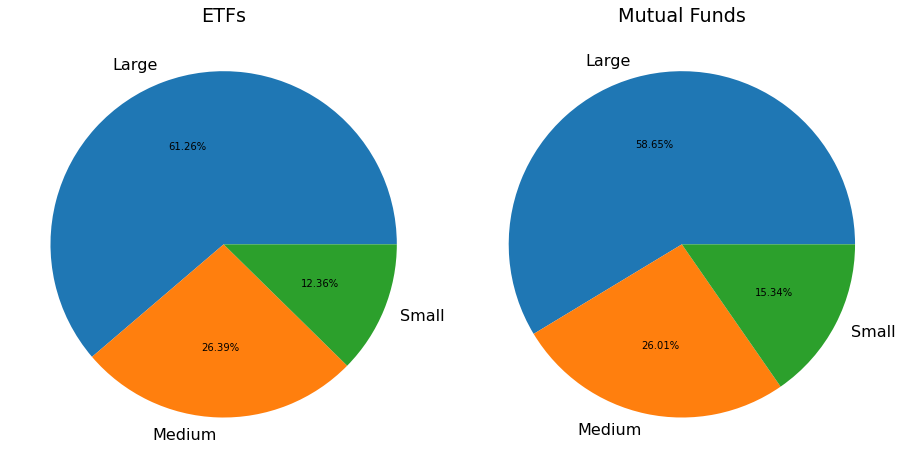

In [21]:
comparison_pies(df_etf,df_mf,'size_type','ETFs','Mutual Funds')

From the pie charts we can see the size of funds is pretty similar across Mutual Funds and ETFs. There are a slightly higher proportion of large Mutual Funds than large ETFs and there are slightly more medium sized ETFs than medium sized Mutual Funds. 

### __Investment Type__

There are three main investment types of for a fund: Growth, Value and Blend. The growth type is a fund that invests primarily in stocks that are expected to increase in capital value rather than yield high income. Value funds follow a policy that focuses on investing in stocks based on fundamental characteristics that are undervalued in quality. Blend funds hold a mix of both growth stock and value stock and contain only stocks and no fixed-income securities.

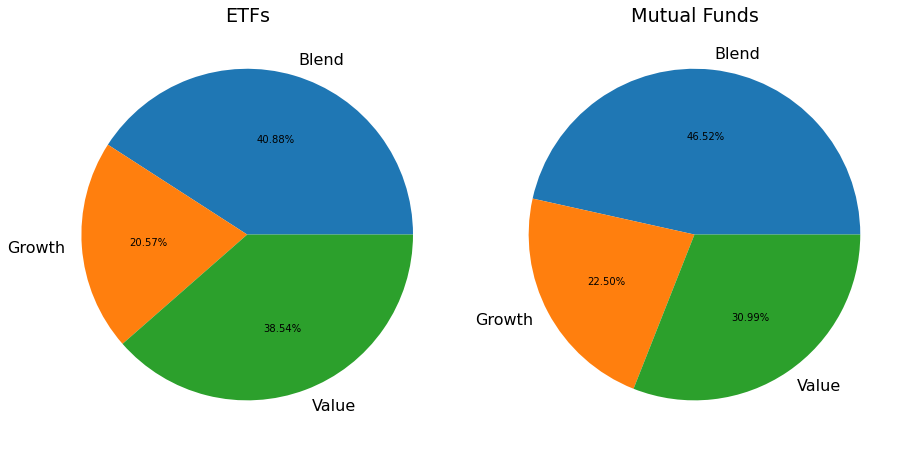

In [22]:
comparison_pies(df_etf,df_mf,'investment_type','ETFs','Mutual Funds')

The proportion of growth funds is very similar across Mutual Funds and ETFs, while the other two proportions are slightly different. The proportion of blend funds in Mutual Funds is greater than that of ETFs, while the proportion of growth funds in Mutual Funds is less than that of ETFs. Overall, investment types are relatively the same across Mutual Funds and ETFs.

### __Asset Distributions__

These graphs shows us the percentages of each type of asset that make up the fund. A distribution is a payment of interest, principal, or dividend by the issuer of the security to investors, and in these graphs, the different distributions are stocks, bonds, cash, and other. 

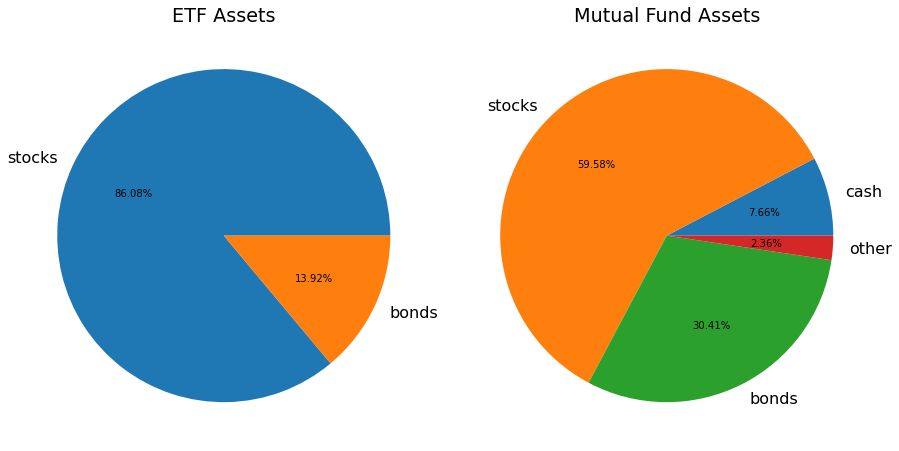

In [23]:
cols=[i for i in df_etf_asset.columns[1:3]]
cols2=[i for i in df_mf_asset.columns[1:7]]

multiple_percent_comp_bar(df_etf_asset,df_mf_asset,cols,cols2,'asset_','ETF Assets',"Mutual Fund Assets")



The asset distributions between Mutual Funds and ETFs appear to be very different. In the case of ETFs, their only two assets are stocks and bonds , while Mutual Funds have stocks, bonds, cash, and a miscellaneous section. ETF's have almost all of their assets in stocks and a very small amount in bonds. Mutual funds have about half their assets in stocks and about a third in bonds, then they have the remaining tenth in cash and miscellaneous. This is a huge difference and one of the most notable differences between the fund types.

### __Sector Distributions__

These graphs shows us the distribution of which sector the funds are investing in. The different sectors in the graph tell us which industry the assets are being invested in.

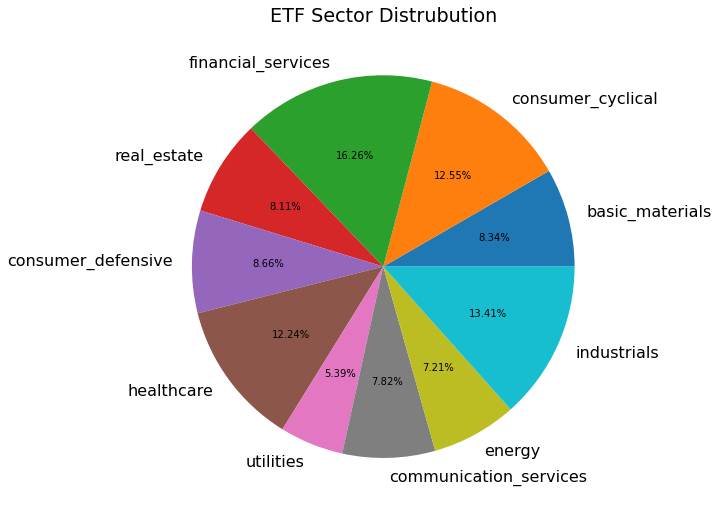

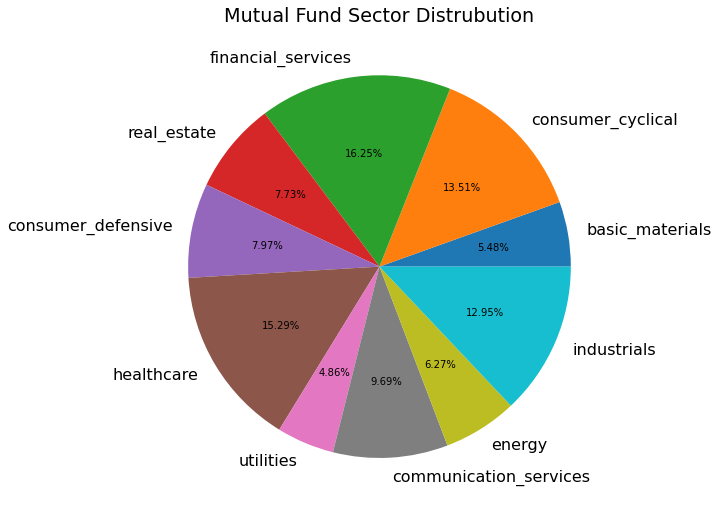

In [24]:
cols=[i for i in df_mf_sector.columns[1:11]]
plt.title('ETF Sector Distrubution')
percent_comp_bar(df_etf_sector,cols,'sector_')
plt.title('Mutual Fund Sector Distrubution')
percent_comp_bar(df_mf_sector,cols,'sector_')

These two sector graphs are very similar between ETFs and Mutual Funds. Each sector has a very similar percentage, varying from around a 1% difference between Mutual Funds and ETFs. The sector with the largest difference is the basic materials sector, still with a minimal difference of approximately 3%. The majority for both graphs is financial services, and the minority for both graphs is utilities. 

### __Risk Ratings__

A metric unique to Mutual Funds is risk rating, which gives a score 1-5 on how risky the fund is.

 Let's look at the proportion of funds with each risk rating in the Mutual Fund dataset: 

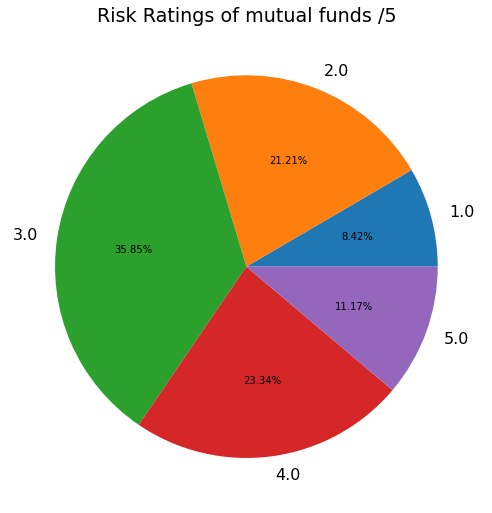

In [25]:
plt.title('Risk Ratings of mutual funds /5')
pie_chart(df_mf,'risk_rating')

Both the safest and riskiest kinds of funds are the most rare and the most common risk rating is a 3.0. Fund ratings with moderate risk or moderate safety are the second most common types.

In investing it is assumed the greater risk you inherit with an investment the more lucrative the returns on the investment. Since it is more likely you will lose money on this investment, you need an additional reward to compensate for the increased risk. Lets use a box and whisker plot to see the distribution of 3 years fund return and see if more of the risky funds lose money on investments than safer funds:


 Distribution of fund_return_3years according to risk_rating in Mutual Funds:



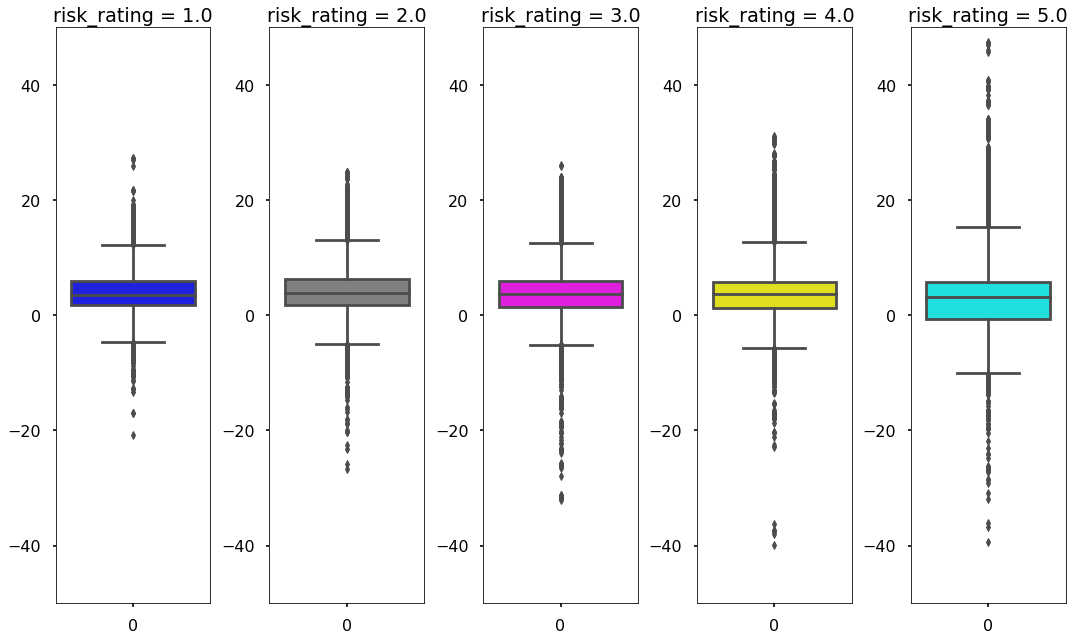

In [26]:
#Price earnings ratio vs. risk rating for Mutual Funds
joined=pd.merge(df_mf,df_mf_return_history)
dep_by_indep_boxplot(joined,'risk_rating','fund_return_3years','Mutual Funds',-50,50)

As can be seen from the visual above, the whiskers get longer as the fund riskyness increases. This is because these riskier funds are more likley to lose lots of money and more likely to gain lots of money if they are profitable. The riskier funds should exhibit more extreme behavior than safer funds,and this can clearly be seen above.

 ### __Distribution By Category__

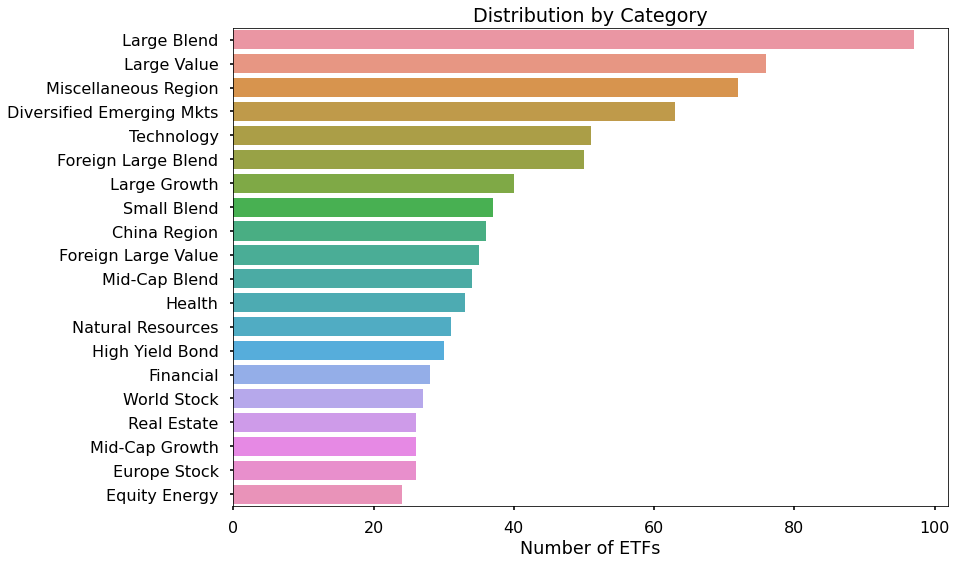

In [27]:
#ETF distribution by category 
plt.xlabel('Number of ETFs')
distribution_by_category(df_etf)

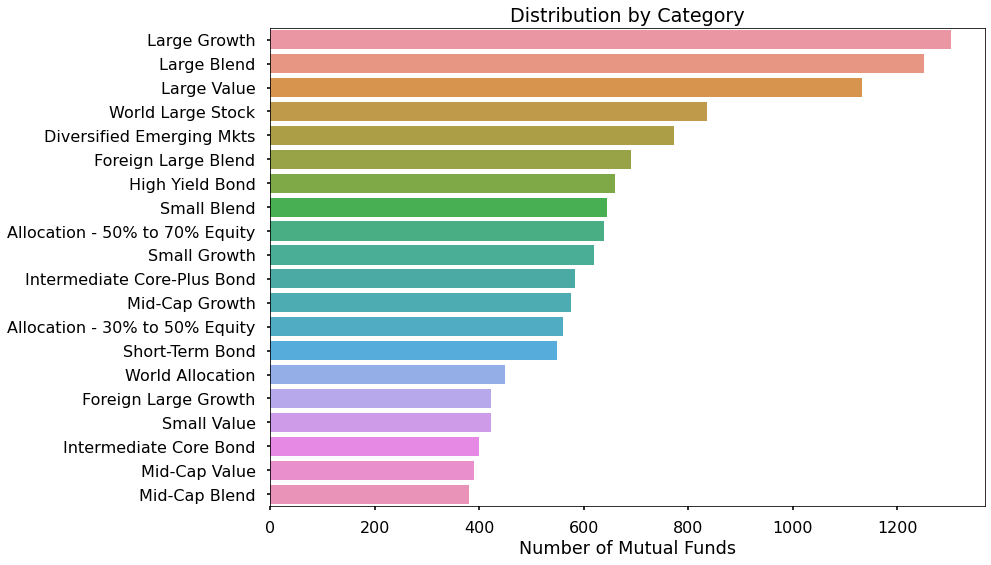

In [28]:
#Mutual funds distribution by category 
plt.xlabel('Number of Mutual Funds')
distribution_by_category(df_mf)

This graph shows us the distribution of the number of funds that make up each category. A fund category is a way of differentiating mutual funds according to their investment objectives and principal investment features. This categorization allows investors to spread their money around in a mix of funds with a variety of risk and return characteristics. 

An obvious thing that can be seen in these two graphs is the large number of Mutual Funds relative to the number of ETFs. Both Mutual Funds and ETFs have a large proportion of large blend and large value funds. The leading category for Mutual Funds is Large Growth funds while Large Growth funds make up a smaller proportion of ETFs. A prominent proportion of Mutual funds are in the Bond category: Short-term bonds, Intermediate Core bonds, etc. We saw that ETFs only have about 10% of their assets in bonds, so it makes sense the proportion of ETFs in the bond category is very low. The categories for ETFs are very sector heavy, while Mutual funds dont have sectors coming up often in their categories -- this is because the fundamental property of EtFs being based off an index which usually span entire sectors.

### __Quantative Comparison of Data Across Categorical Variables__

Box and whisker plots allow for comparison of data from different categories easier

__Fund Size and Short Term Fund Return:__


 Distribution of fund_return_1year according to size_type in ETFs:



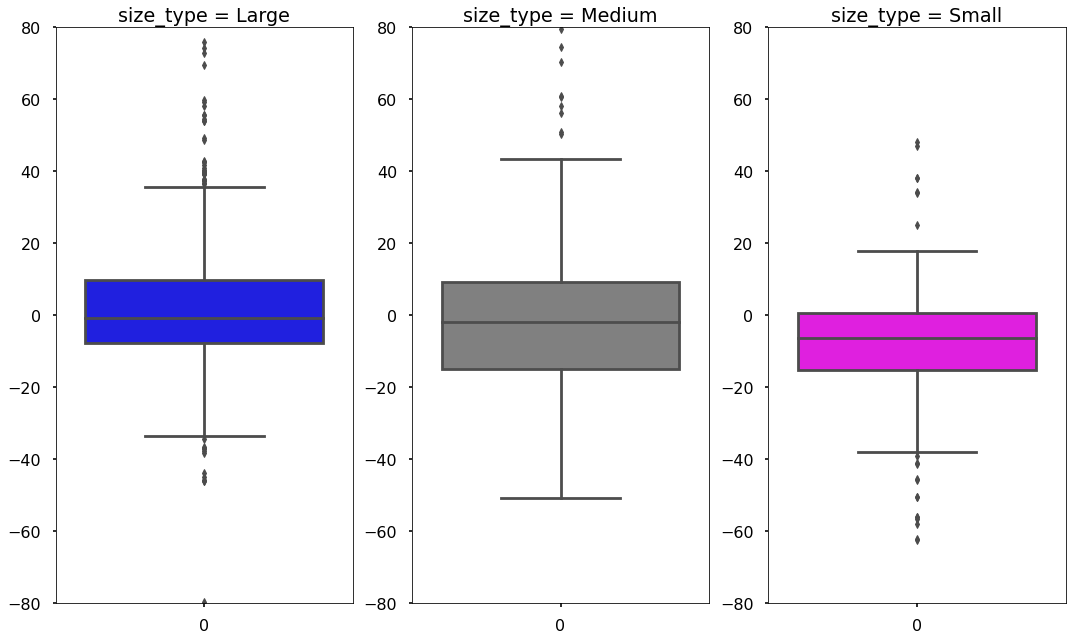

In [29]:
#ETF Fund size vs. 1 year fund return
joined=pd.merge(df_etf,df_etf_return_history)
dep_by_indep_boxplot(joined,'size_type','fund_return_1year','ETFs',-80,80)

These box and whisker plots show their might be a difference in short term ETF fund return and size of the ETF. The Large ETFs have a 1 year mean fund return much higher than that of the mean 1 year fund return for small ETFs. The Interquartile range is pretty large for each of the fund sizes and this is to be expected because 1 year of returns is not a long enough time to determine the performance of a fund, as you can expect more variation in outcome because of the limited time frame. If we were to make a boxplot of 10year return, the interquartile range would shrink drastically. 


 Distribution of fund_return_1year according to size_type in Mutual Funds:



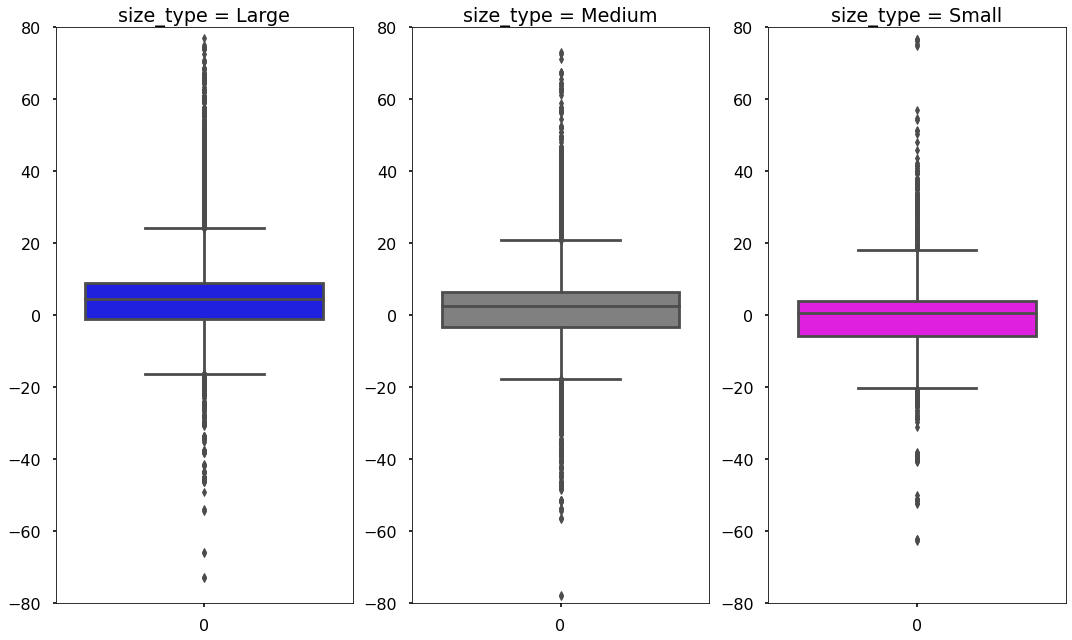

In [30]:
#Mutual Fund size vs. 1 year fund return
joined=pd.merge(df_mf,df_mf_return_history)
dep_by_indep_boxplot(joined,'size_type','fund_return_1year','Mutual Funds',-80,80)

A profound difference in the Box and Whisker plots of Mutual funds is the difference in Interquarile ranges. The interquartile range for each fund size is significantly less than the interquartile ranges for ETFs. The lengths of the whiskers for Mutual funds are also much longer than the whiskers for the ETFs, showing their is more variance in short term fund reurn for ETFs than Mutual Funds. The number of outliers with Mutual Funds is significantly higher than the number of outliers for the ETF, and this is likely due to the higher number of funds in the Mutual Funds than ETFs. 

__Investment Type and Fund Return Year to Date:__


 Distribution of fund_return_ytd according to investment_type in ETFs:



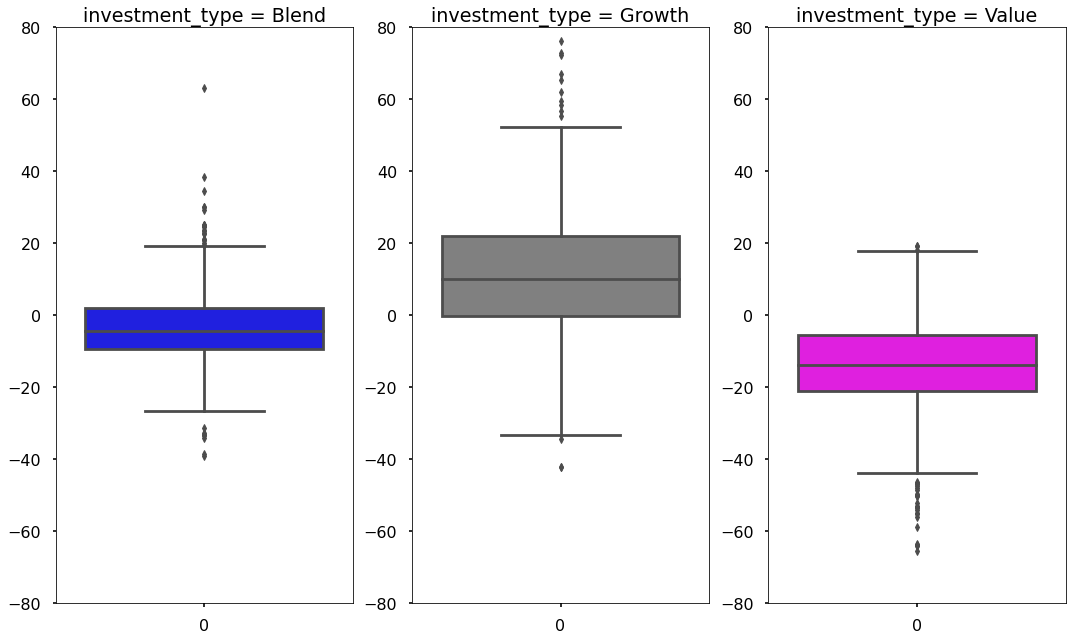

In [31]:
#Investment type vs. ETF YTD return
joined=pd.merge(df_etf,df_etf_return_history)
dep_by_indep_boxplot(joined,'investment_type','fund_return_ytd','ETFs',-80,80)

This graph shows us the distribution of the fund returns in the past years time based on the investment type of a fund. From this we can see that growth funds have median short term returns much higher than that of the returns for the other categories. The interquartile ranges for each of the investment types seem to be about the same, so the difference within the investment type categories is about the same for all categories. Value funds notably have more outliers on the lower end of their plot than the other investment types, and they have more outliers than all the other investment types. Outliers for Growth and Value funds could be eiter a good or bad thing, you could have more fund returns than normal or less fund returns for normal. For value funds an outlier is surely a bad thing, as you will likely have an underperforming fund.



### __Summary Statistics For Both Datasets__

computing the summary statistics for ETFs:

In [32]:
columns = []
means = []
standard_devs = []
medians = []

data = [df_etf,df_etf_ratios,df_etf_stats]

for x in data: 
    for cols in x:
        if type(x[cols][0]) == np.float64:
            columns.append(cols)
            means.append(x[cols].mean())
            standard_devs.append(x[cols].std())
            medians.append(x[cols].median())


df_etf_summary_stats = pd.DataFrame()
df_etf_summary_stats['ETF Feature'] = columns
df_etf_summary_stats['Mean'] = means 
df_etf_summary_stats['Standard Deviation'] = standard_devs 
df_etf_summary_stats['Median'] = medians 

df_etf_summary_stats

NameError: name 'df_etf_stats' is not defined

computing the summary statistics for Mutual Funds:

In [33]:
columns = []
means = []
standard_devs = []
medians = []

data = [df_mf]

for x in data:
    for cols in x:
        if type(x[cols][0]) == np.float64:
            columns.append(cols)
            means.append(df_mf[cols].mean())
            standard_devs.append(df_mf[cols].std())
            medians.append(df_mf[cols].median())

df_mf_summary_stats = pd.DataFrame()
df_mf_summary_stats['MF Feature'] = columns
df_mf_summary_stats['Mean'] = means 
df_mf_summary_stats['Standard Deviation'] = standard_devs 
df_mf_summary_stats['Median'] = medians 

df_mf_summary_stats

,MF Feature,Mean,Standard Deviation,Median
0,rating,3.032126,1.102552,3.00
1,return_rating,3.024296,1.101567,3.00
2,risk_rating,3.076363,1.106091,3.00
3,median_market_cap,39238.487202,51251.055463,20772.24
4,bond_maturity,5.570877,2.546605,6.07
5,bond_duration,3.716140,1.663970,3.45
6,fund_yield,1.908593,3.230563,1.62
7,fund_alpha_3years,-1.448484,6.262830,-0.78
8,fund_alpha_5years,-1.082723,4.692942,-0.56
9,fund_alpha_10years,-0.719488,3.635951,-0.42


# __Pre-registration of Analyses:__

1. The overall premise of this idea is to create a method or predictor variable that predicts the success of a fund. To do this, we will analyze the variables of the funds that we have in our data set to see which variables are most closely correlated with the success of a fund. After finding which variables are most closely correlated with the success of a fund, we will define a model that uses these variables to predict fund returns in given time periods. This will provide us with a deeper understanding of which factors most greatly influence fund performance and which variables have little effect on fund performance. By exploring the correlations between variables and fund success, we will further discover the intricacy of what makes a fund successful or unsuccessful. We will perform a factor analysis of sorts for each of the two fund types -- ETFs and Mutual funds -- and compare the relationships between variables that make that specific fund type successful. We aim to distinguish the success of funds in different time frames, short term,medium term, and long term, as they may have differing contributing variables. __The point of this analysis is to make a finding about the distinguishing characteristics of successful ETFs and Mutual funds -- and what makes these respective fund types successful in the long and short term.__ 
2. Our second idea focuses more on the binary characteristics of funds. An example variable in our data set we could use for a binary analysis is where a fund is above a certain success rate - by differentiating funds into 2 categories , one where the fund is above average (however we determine this average) or below average. __The point of this analysis is to find connections between fund success but on a more broad level using binary values. This would give us a broader basis of comparison for each of the funds, since we already will have a more narrow basis of comparison from Analysis 1.__ We could also use this type of analysis to determine which individual size type is most closely correlated with fund success (Ex: size is large or not large, size is small or not small). Alternatively, we could try to predict the fund success based on fund type. We could have the success of a fund be represented as a binary value-- where we are determining the basis for success. Analysis of binary variables can be quite useful in determining the direct relationship between the presence of a certain variable and fund success because the external influences are limited. Thinking in terms of binary characteristics is a very effective way to analyse different aspects of something. It helps when you want to stay broad and not have too many categories, and this is what we want to do with this analysis. Our first analysis was looking into more specific variables, where this one takes a broader approach to looking at the fund in the bigger picture and a little more simply by using binary characteristics.


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# __Analysis of Sectors of Investment:__

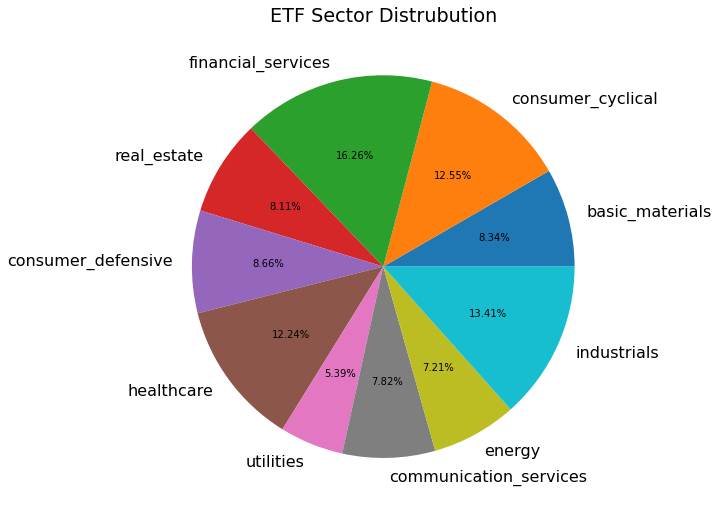

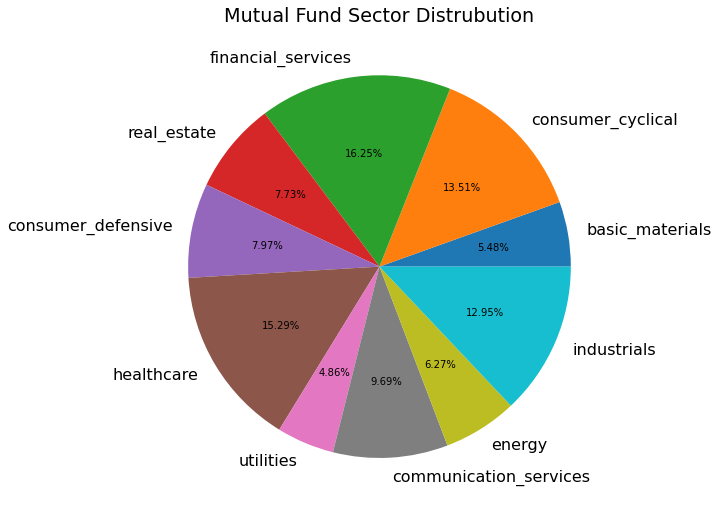

In [34]:
cols=[i for i in df_mf_sector.columns[1:11]]
plt.title('ETF Sector Distrubution')
percent_comp_bar(df_etf_sector,cols,'sector_')
plt.title('Mutual Fund Sector Distrubution')
percent_comp_bar(df_mf_sector,cols,'sector_')



As we can see from the pie charts, the average sector holdings between both Mutual Funds and Exchange Traded Funds are very similar. The biggest margin of difference in sector holdings is about 3%. The biggest differences between sector holdings are that ETF's seem to have a 3% greater investment in companies in the basic materials sector and Mutual funds have roughly a 3% greater involvement in technology,healthcare, and communication services. We will perform a regression to see how correlated percent investment in each financial sector is with fund returns and if this slight difference in sector investment has an impact on fund returns.



Doing a single regression on sector investment and fund returns:


In [35]:
sectors=['sector_basic_materials','sector_consumer_cyclical','sector_financial_services','sector_real_estate',
        'sector_communication_services','sector_energy',
        'sector_industrials','sector_technology','sector_healthcare']

mfjoined=pd.merge(df_mf,df_mf_sector).dropna()
mfjoined=mfjoined.merge(df_mf_return_history).dropna()

mfs=get_correlations(mfjoined,sectors,'fund_return_ytd')


etfjoined=pd.merge(df_etf,df_etf_sector).dropna()
etfjoined=etfjoined.merge(df_etf_return_history).dropna()

etfs=get_correlations(etfjoined,sectors,'fund_return_ytd')

etfs.head()


,correlation
sector_basic_materials,0.0006
sector_consumer_cyclical,0.0580
sector_financial_services,0.0572
sector_real_estate,0.0317
sector_communication_services,0.0634


cleaning up the column names:

In [36]:
names=['Materials','Consumer Cyclical','Financial Services','Real Estate','Communication services','Energy','Industrials','Technology','Healthcare']
mfs.set_axis(names,axis=0,inplace=True)
etfs.set_axis(names,axis=0,inplace=True)

Visualizing the correlations for Mutual Funds:

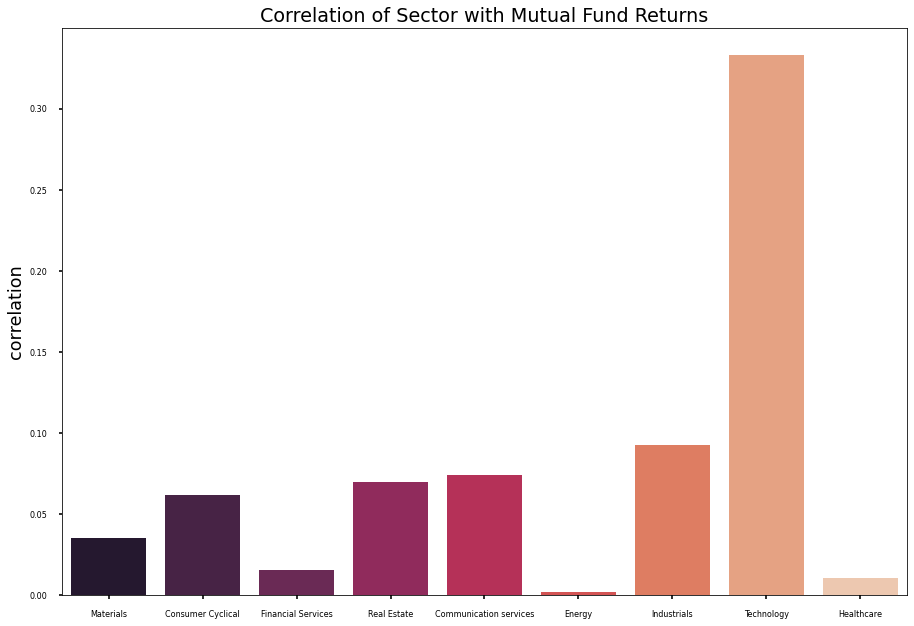

In [37]:
corr_visualize(mfs,.001,'Correlation of Sector with Mutual Fund Returns',8)

Visualizing the correlations for ETFS:

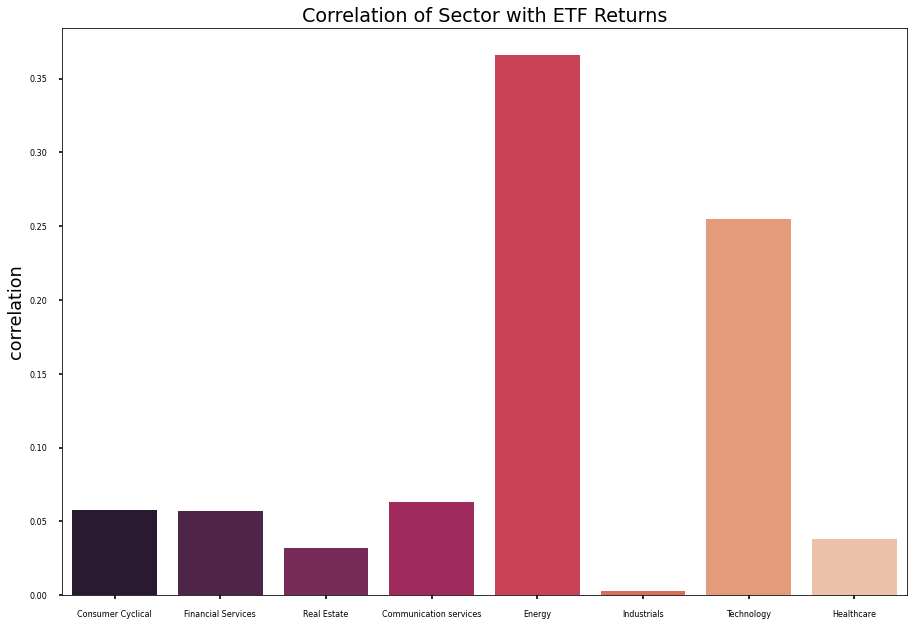

In [38]:
corr_visualize(etfs,.001,'Correlation of Sector with ETF Returns',8)


Visualizing the correlatons side by side:

(0.01, 0.4)

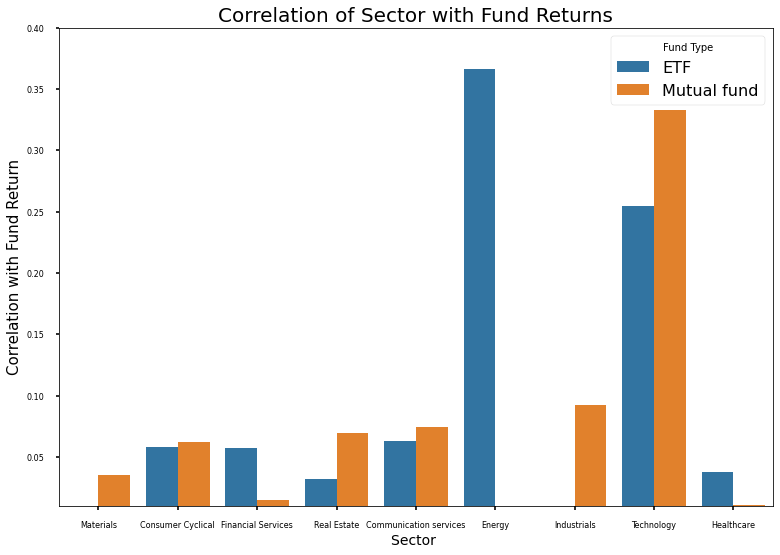

In [39]:
mfs['Fund Type']='Mutual fund'
etfs['Fund Type']='ETF'


sectors=['sector_basic_materials','sector_consumer_cyclical','sector_financial_services','sector_real_estate',
        'sector_communication_services','sector_energy',
        'sector_industrials','sector_technology','sector_healthcare']
bothsects=pd.concat([etfs,mfs])
g=sns.barplot(x=bothsects.index,y=bothsects['correlation'],data=bothsects,hue='Fund Type')
plt.tick_params(labelsize=8)

plt.title("Correlation of Sector with Fund Returns", fontsize = 20)
plt.xlabel("Sector ", fontsize = 14)
plt.ylabel("Correlation with Fund Return", fontsize = 15)
g.set_ylim(.01,.40)

As we can see from the visualization, sector investment generally has a positive and very weak correlation with fund returns. The highest correlation between sector investment and fund return is for technology investments. While this correlation is the strongest, it has a weak to moderate postitive correlation with fund returns with an r value of only .30 for ETFs and .35 for Mutual Funds. A shocking discovery is that investments in the energy sector is weakly to moderatetly correlated with fund returns for ETFs and not at all correlated to returns in Mutual Funds! In our breakdown of sector investment differences between Mutual Funds and ETFs we noted that Mutuals Funds invested more in technology,health care,and communication sectors and ETFs invested more in the basic materials sector. In our correlations we can see that investment in any of these sectors, besides the technology sector, had almost no correlation with fund returns. The differences in fund returns on a whole for Mutual Funds and ETFs then cannot be generally attributed to a difference in investment sectors.


Investors who have a positive outlook on energy stocks and want that sector to be well represented in the fund portfolio should likely look to invest in ETFs over Mutual Funds. Investment in the energy sector seemingly generates no returns for Mutual funds, and this could possibly be contributed to a variety of differences in the structure of mutual fund management. ETFs might have the advantage of allowing very diverse investment within the energy sector and are more likely to capture the rewards from the sector as a whole, while Mutual Funds may pick and choose certain energy companies they want to invest in - and they must have picked these companies poorly over the last decade. The overwhelming success of energy stocks such as Tesla have been downplayed and heavily shorted by fund managers, and this may explain why Mutual Funds don't seem to generate as much returns from the energy sector as ETFs do.

# __Correlations and Predictor Variable__

When choosing a fund to invest in, the investor is given many financial ratios and fund descriptors in order to support his investment decision. In this section we are going to explore if we can predict above average fund returns for a single time period for either type of fund, Mutual Fund or ETF, using the descriptors that would be available to the investor at the time of investing. If this is possible then the investor could simply evaluate a fund based solely on the descriptors given at time of investment. The success rate of this variable could potentially affect the way that one would invest in either Mutual Funds or ETFs.

Text(0.5, 1.0, 'Correlations Heatmap for Mutual Funds')

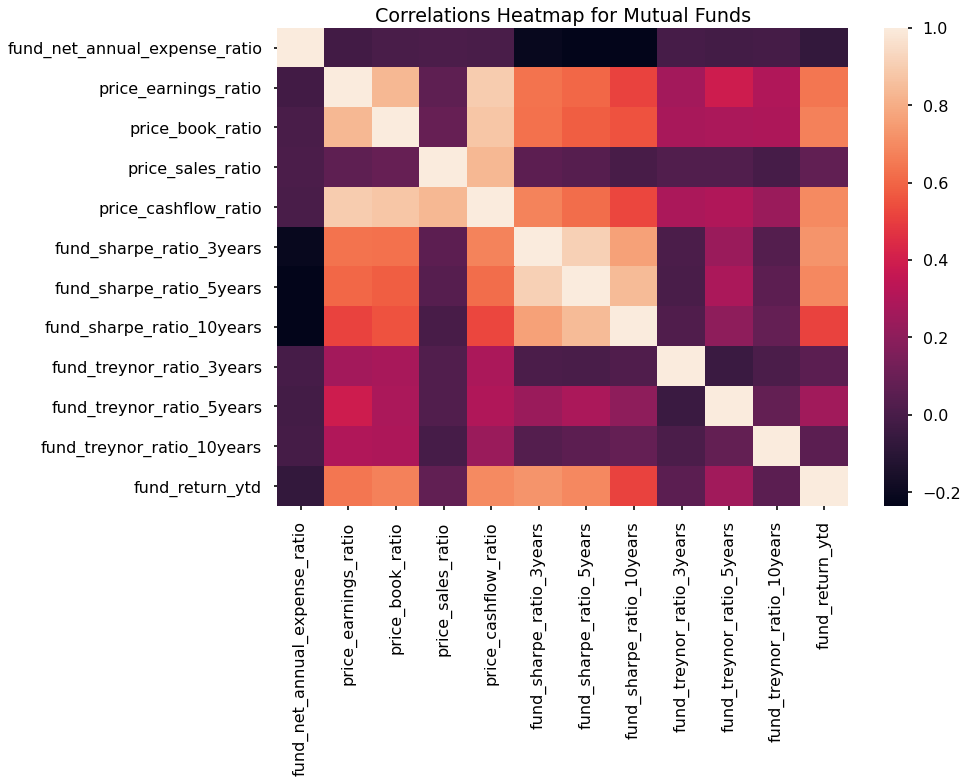

In [40]:
#Using a heatmap to find the variables most correlated ratios to fund returns for MFs
new_df_mf = df_mf.drop(['fund_symbol', 'fund_extended_name', 'investment_strategy', 'category'], axis = 1)
new_df_mf.inception_date = pd.to_datetime(new_df_mf.inception_date)

new_df_mf_ratios = df_mf_ratios.drop(['fund_symbol'], axis = 1)
new_df_mf_ratios['fund_return_ytd'] = new_df_mf['fund_return_ytd']
new_df_mf = pd.get_dummies(new_df_mf)
sns.heatmap(new_df_mf_ratios.corr())
plt.title('Correlations Heatmap for Mutual Funds')

Text(0.5, 1.0, 'Correlations Heatmap for ETFs')

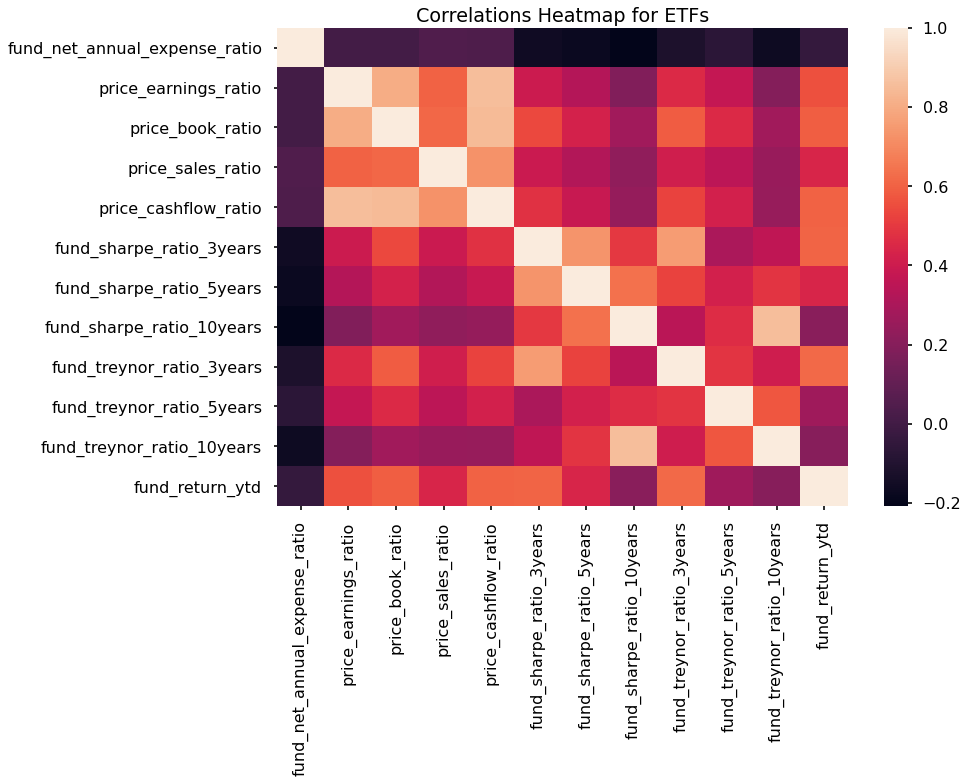

In [41]:
#Using a heatmap to find the variables most correlated ratios to fund returns for ETFs
new_df_etf = df_etf.drop(['fund_symbol', 'fund_extended_name', 'investment_strategy', 'category'], axis = 1)
new_df_etf.inception_date = pd.to_datetime(new_df_etf.inception_date)

new_df_etf_ratios = df_etf_ratios.drop(['fund_symbol'], axis = 1)
new_df_etf_ratios['fund_return_ytd'] = new_df_etf['fund_return_ytd']
new_df_etf = pd.get_dummies(new_df_etf)

sns.heatmap(new_df_etf_ratios.corr())
plt.title('Correlations Heatmap for ETFs')

These two heat maps show us the correlation values based on a color scale that is given to the right. The lighter colors represent higher correlation values. It is obvious that there would be a diagonal line going through the middle of all perfect correlation values, because these are the boxes that are measuring variable’s correlation to themselves. The rest of the heat maps give us data that is new regarding each variable’s correlation to each other and most importantly their correlations to the fund return column. The only pattern that seems to be prominent is on the ETF graph, where all of the different price ratios seem to have a lighter cluster of squares, signifying high correlations between the price ratios. The Mutual Funds heatmap does not show a pattern like this, but is rather more randomly distributed with colors. 

Random Forest Regressor to find which ratios are most important to consider when investing in mutual funds. 

In [42]:

model3 = RandomForestRegressor()
new_mf_rats = new_df_mf_ratios.dropna()
y3 = new_mf_rats['fund_return_ytd']
X3 = new_mf_rats.drop(['fund_return_ytd'], axis = 1)
#X2['inception_date'] = X2['inception_date'].apply(lambda x: x.toordinal())
model3.fit(X3,y3)

mf_feat = pd.DataFrame(np.array(model3.feature_importances_).T, index = X3.columns, columns = ['feature_importances']).sort_values(ascending = False, by = 'feature_importances')
mf_feat['correlations'] = new_mf_rats.corr()['fund_return_ytd'].drop(['fund_return_ytd'])

exog3 = sm.add_constant(X3,prepend = False)
linearmodel3 = sm.OLS(y3, exog3)
result3 = linearmodel3.fit()
print(result3.summary())

mf_feat['p_values'] = pd.Series(result3.pvalues.round(3)).drop('const')
mf_feat

                            OLS Regression Results                            
Dep. Variable:        fund_return_ytd   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     4114.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        23:41:25   Log-Likelihood:                -39045.
No. Observations:               12072   AIC:                         7.811e+04
Df Residuals:                   12060   BIC:                         7.820e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
fund_net_annua

,feature_importances,correlations,p_values
fund_sharpe_ratio_3years,0.494351,0.845942,0.000
fund_treynor_ratio_3years,0.298310,0.328614,0.000
fund_treynor_ratio_10years,0.034251,0.294740,0.000
price_cashflow_ratio,0.032335,0.735006,0.000
price_earnings_ratio,0.027235,0.693935,0.549
price_book_ratio,0.026766,0.743673,0.000
fund_treynor_ratio_5years,0.024414,0.490889,0.018
fund_sharpe_ratio_10years,0.023103,0.562443,0.000
price_sales_ratio,0.022242,0.580667,0.000
fund_sharpe_ratio_5years,0.010811,0.788614,0.000


Random Forest Regressor to find which ratios are most important to consider when investing in ETFs. 

In [43]:
model4 = RandomForestRegressor()
new_etf_rats = new_df_etf_ratios.dropna()
y4 = new_etf_rats['fund_return_ytd']
X4 = new_etf_rats.drop(['fund_return_ytd'], axis = 1)
#X2['inception_date'] = X2['inception_date'].apply(lambda x: x.toordinal())
model4.fit(X4,y4)

etf_feat = pd.DataFrame(np.array(model4.feature_importances_).T, index = X4.columns, columns = ['feature_importances']).sort_values(ascending = False, by = 'feature_importances')
etf_feat['correlations'] = new_etf_rats.corr()['fund_return_ytd'].drop(['fund_return_ytd'])

exog4 = sm.add_constant(X4,prepend = False)
linearmodel4 = sm.OLS(y4, exog4)
result4 = linearmodel4.fit()
print(result4.summary())

etf_feat['p_values'] = pd.Series(result4.pvalues.round(3)).drop('const')
etf_feat

                            OLS Regression Results                            
Dep. Variable:        fund_return_ytd   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     141.6
Date:                Wed, 12 May 2021   Prob (F-statistic):          4.21e-203
Time:                        23:41:26   Log-Likelihood:                -4350.6
No. Observations:                1132   AIC:                             8725.
Df Residuals:                    1120   BIC:                             8785.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
fund_net_annua

,feature_importances,correlations,p_values
fund_treynor_ratio_3years,0.430834,0.686036,0.000
price_earnings_ratio,0.156700,0.579271,0.000
price_book_ratio,0.114723,0.577778,0.489
price_cashflow_ratio,0.066900,0.596354,0.000
fund_net_annual_expense_ratio,0.064153,0.005428,0.000
price_sales_ratio,0.045378,0.436207,0.063
fund_sharpe_ratio_3years,0.043967,0.638317,0.458
fund_treynor_ratio_5years,0.042611,0.509275,0.000
fund_sharpe_ratio_5years,0.013225,0.446727,0.001
fund_treynor_ratio_10years,0.011355,0.214363,0.000


Sorting by decreasing value so the highest correlated entries appear first. 

In [89]:
df_mf_highest_corrs=mf_feat.sort_values(by=['correlations'],ascending=False)
df_etf_highest_corrs=etf_feat.sort_values(by=['correlations'],ascending=False)

etf_vars=df_etf_highest_corrs.index[:7]
mf_vars=df_mf_highest_corrs.index[:7]

#First instance of df_mf3/df_etf3
df_mf3[mf_vars]=StandardScaler().fit_transform(df_mf3[mf_vars])
df_etf3[etf_vars]=StandardScaler().fit_transform(df_etf3[etf_vars])



df_mf3['ytd_score']=0
df_etf3['ytd_score']=0

for var in mf_vars:   
    mf_score=df_mf3[var]*(df_mf_highest_corrs.loc[var,'correlations'])
    df_mf3['ytd_score']+=mf_score
    #print(mf_score)


for var in etf_vars:   
    etf_score=df_etf3[var]*(df_etf_highest_corrs.loc[var,'correlations'])
    df_etf3['ytd_score']+=etf_score
    #print(etf_score)

    
#more columns to include in final dfs
fund=['fund_return_3years','fund_return_5years','fund_return_10years','fund_mean_annual_return_3years']
cats=['category_return_3years','category_return_5years','category_return_10years']

mf_cols=df_mf.columns.to_list()
mf_cols.extend(mf_vars)
mf_cols.extend(cats)
mf_cols.extend(fund)
mf_cols.append('ytd_score')
mf_cols.append('category_return_ytd')
mf_final=pd.DataFrame()
for col in mf_cols:
    mf_final[col]=df_mf3[col]

etf_cols=df_etf.columns.to_list()
etf_cols.extend(etf_vars)
etf_cols.extend(cats)
etf_cols.extend(fund)
etf_cols.append('ytd_score')
etf_cols.append('category_return_ytd')
etf_final=pd.DataFrame()
for col in etf_cols:
    etf_final[col]=df_etf3[col]

**EXPORTING OUR FINAL DATAFRAMES**

In [88]:
mf_final.to_csv('mf_final.csv',index=False)
etf_final.to_csv('etf_final.csv',index=False)

Adding column to Mutual Fund dataframe that tells whether a value is above average return for ytd, 3years, 5years, 10 years

In [46]:
mf_final.dropna(subset=['category_return_ytd'],inplace=True)

ytd_index=mf_final.columns.get_loc('fund_return_ytd')
cat_ytd_index=mf_final.columns.get_loc('category_return_ytd')

greater_list=[]
for i in range(mf_final.shape[0]):
    if (mf_final.iloc[i,ytd_index]< mf_final.iloc[i,cat_ytd_index]):
        greater_list.append(0)
    else:
        greater_list.append(1)

mf_final['>average']=greater_list


Adding column to ETF dataframe that tells whether a value is above average return for ytd, 3years, 5years, 10 years

In [87]:
etf_final.dropna(subset=['category_return_ytd'],inplace=True)
ytd_index=etf_final.columns.get_loc('fund_return_ytd')
cat_ytd_index=etf_final.columns.get_loc('category_return_ytd')

greater_list=[]
for i in range(etf_final.shape[0]):
    if (etf_final.iloc[i,ytd_index]< etf_final.iloc[i,cat_ytd_index]):
        greater_list.append(0)
    else:
        greater_list.append(1)

etf_final['>average']=greater_list


Predictors: ytd_score


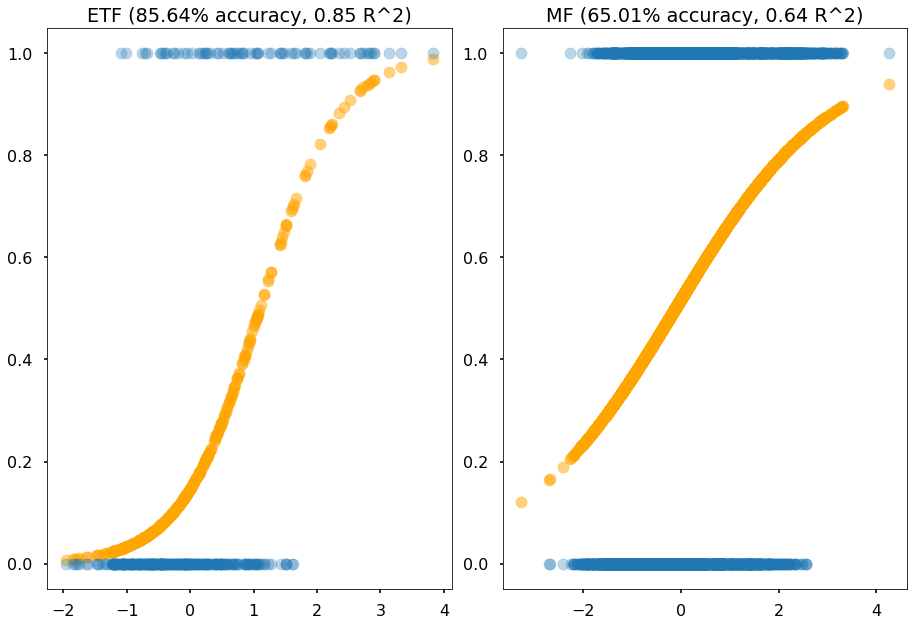

In [48]:
log_prob(etf_final,mf_final,'ytd_score','>average')

Using our logistic regression we see how well our score variable predicts above average fund return. For Mutual Funds it is not very good, for ETFs it is highly predictive. 

## __Time Frame Analysis__

A common question amongst individuals investing in a fund is how long to hold that specific fund position. Based off the various financial circumstances of each investor, fund positions can be held for various lengths of time. In this section we look for the ideal length of time to hold fund positions for each of the fund types, and an answer to the general question if there is a superior fund type for investing for a known length of time.

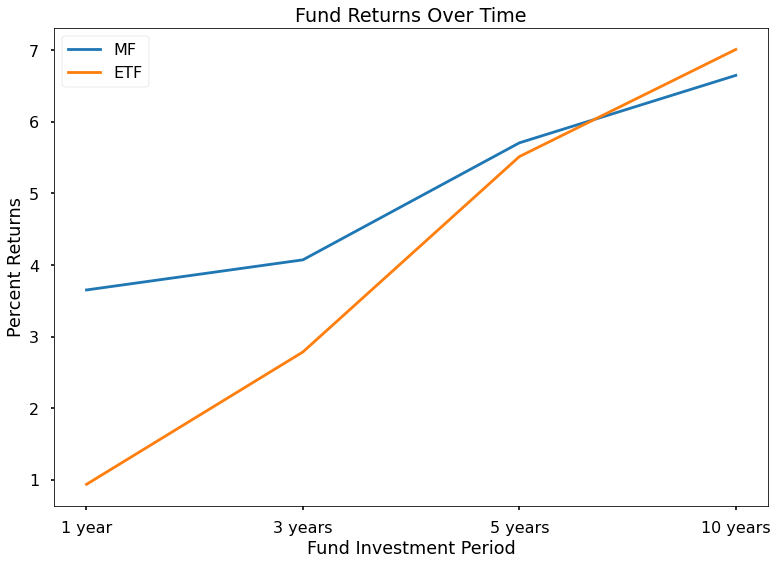

In [49]:
mfReturns=df_mf_return_history[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()
etfReturns=df_etf_return_history[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()


names=['1 year','3 years','5 years','10 years']
mfReturns.set_axis(names,axis=0,inplace=True)
etfReturns.set_axis(names,axis=0,inplace=True)


plt.plot(mfReturns)
plt.plot(etfReturns)

plt.title('Fund Returns Over Time')
plt.ylabel('Percent Returns')
plt.xlabel('Fund Investment Period')
plt.legend(['MF','ETF'])


As we can see from this graph, Mutual Funds initially have greater returns than ETFs for the first 3 years of holding the fund position. This is because the active management style of Mutual Funds allows the fund to be more agile and reactive in their decisions, leading to more profitable returns in the short term. After 5 years of holding the fund investment ETF returns start to eclipse the returns of Mutual Funds, and from the period of 5 to 10 years the returns of ETFs are greater than that of mutual funds.

### Investment Type Analysis

There are several different 'kinds' of fund types. The main 3 types are growth funds, value funds, and blend funds. Growth funds are funds associate with a higher risk rating in order to potentially gain more rewards. Value funds are often cheaper than growth funds and pay a dividend to its shareholders. While Blend funds are a mix of the two.

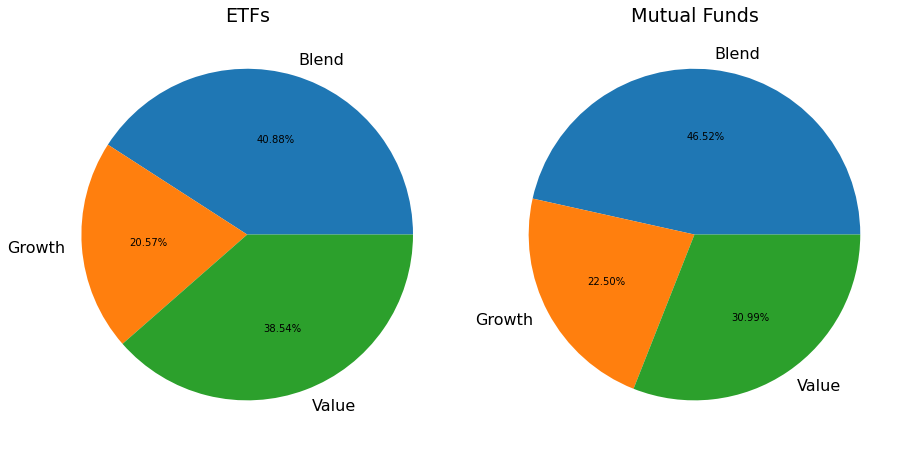

In [50]:
comparison_pies(df_etf,df_mf,'investment_type','ETFs','Mutual Funds')

How do the returns over time compare between these fund investing styles?

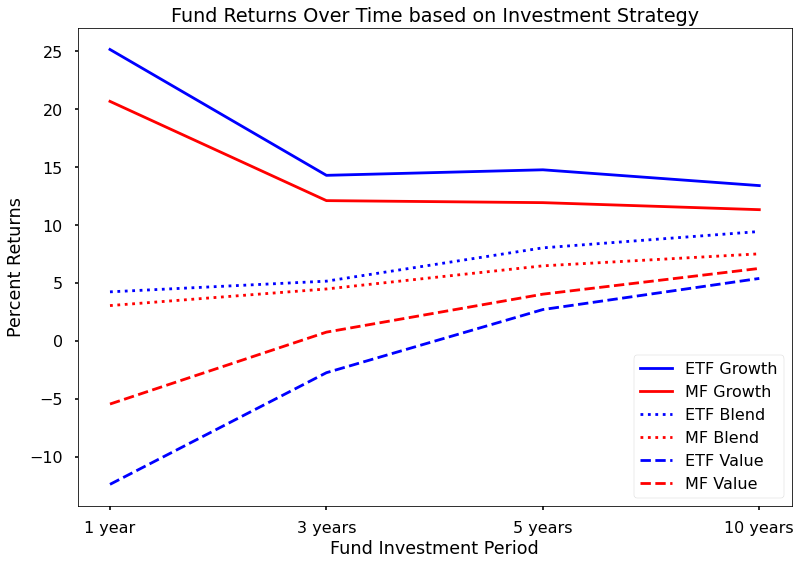

In [51]:
#sorting by investment type
mfGrowth=df_mf.where(df_mf['investment_type']=='Growth')
mfValue=df_mf.where(df_mf['investment_type']=='Value')
mfBlend=df_mf.where(df_mf['investment_type']=='Blend')

etfGrowth=df_etf.where(df_etf['investment_type']=='Growth')
etfValue=df_etf.where(df_etf['investment_type']=='Value')
etfBlend=df_etf.where(df_etf['investment_type']=='Blend')


#merging fund history
etfGrowth=pd.merge(etfGrowth,df_etf_return_history).dropna()
etfValue=pd.merge(etfValue,df_etf_return_history).dropna()
etfBlend=pd.merge(etfBlend,df_etf_return_history).dropna()



mfGrowth=pd.merge(mfGrowth,df_mf_return_history).dropna()
mfValue=pd.merge(mfValue,df_mf_return_history).dropna()
mfBlend=pd.merge(mfBlend,df_mf_return_history).dropna()




etfGrowthReturns=etfGrowth[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()
etfValueReturns=etfValue[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()
etfBlendReturns=etfBlend[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()

mfGrowthReturns=mfGrowth[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()
mfValueReturns=mfValue[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()
mfBlendReturns=mfBlend[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()
names=['1 year','3 years','5 years','10 years']

etfGrowthReturns.set_axis(names,axis=0,inplace=True)
etfValueReturns.set_axis(names,axis=0,inplace=True)
etfBlendReturns.set_axis(names,axis=0,inplace=True)

mfGrowthReturns.set_axis(names,axis=0,inplace=True)
mfValueReturns.set_axis(names,axis=0,inplace=True)
mfBlendReturns.set_axis(names,axis=0,inplace=True)



plt.plot(etfGrowthReturns,color = 'blue')
plt.plot(mfGrowthReturns,color = 'red')


plt.plot(etfBlendReturns,color = 'blue',ls='dotted')
plt.plot(mfBlendReturns,color = 'red',ls='dotted')

plt.plot(etfValueReturns,color = 'blue',ls='dashed')
plt.plot(mfValueReturns,color = 'red',ls='dashed')




plt.title('Fund Returns Over Time based on Investment Strategy')
plt.ylabel('Percent Returns')
plt.xlabel('Fund Investment Period')
plt.legend(['ETF Growth','MF Growth','ETF Blend','MF Blend','ETF Value','MF Value'])



This graph shows the surpising differences in fund returns based on Investment strategy. Funds with growth strategies have overwhelming amounts of fund returns in the first year of investment and then their returns rapidly decline after 1 year. Within growth funds, ETF's have a significant advantage over Mutual Funds for all investment periods. ETFs have on average 10% better returns at 1 year and roughly 5% better returns after 1 year. For blend funds the returns start slightly above zero and steadily increase all the way to 10 years. There is almost no difference between Mutual Funds and ETFs for blend funds. The blend funds exhibit a shape very similar to the returns over time for each respective fund shown previously, and this is because blend funds make up the majority percentage of fund strategies. Value funds start off with very large negative returns and rapidly increase after 1 year and cross into the positive return threshold at about 2 years for mutual funds and 4 years for ETFs. Value funds have negative returns because they pay their shareholders a higher dividend compared to blend funds, who pay a small dividend, and Growth funds who usually pay close to no dividends.

In order to get a more accurate representation of the Total fund returns we should consider the fund yield, which shows the interest and dividends the fund pays throughout the course of a single year.

In [52]:
#sorting by investment type
mfGrowth=mf_final.where(df_mf['investment_type']=='Growth')
mfValue=mf_final.where(df_mf['investment_type']=='Value')
mfBlend=mf_final.where(df_mf['investment_type']=='Blend')

etfGrowth=etf_final.where(df_etf['investment_type']=='Growth')
etfValue=etf_final.where(df_etf['investment_type']=='Value')
etfBlend=etf_final.where(df_etf['investment_type']=='Blend')


#merging fund history
etfGrowth=pd.merge(etfGrowth,df_etf).dropna()
etfValue=pd.merge(etfValue,df_etf).dropna()
etfBlend=pd.merge(etfBlend,df_etf).dropna()

mfGrowth=pd.merge(mfGrowth,df_mf).dropna()
mfValue=pd.merge(mfValue,df_mf).dropna()
mfBlend=pd.merge(mfBlend,df_mf).dropna()



#taking the average fund yield for each
etfGrowthYield=etfGrowth['fund_yield'].mean()
etfBlendYield=etfBlend['fund_yield'].mean()
etfValueYield=etfValue['fund_yield'].mean()

mfGrowthYield=mfGrowth['fund_yield'].mean()
mfBlendYield=mfBlend['fund_yield'].mean()
mfValueYield=mfValue['fund_yield'].mean()

Yields=[etfGrowthYield,etfBlendYield,etfValueYield,mfGrowthYield,mfBlendYield,mfValueYield]

mean_returns=[etfGrowth.fund_mean_annual_return_3years.mean(),etfBlend['fund_mean_annual_return_3years'].mean(),etfValue['fund_mean_annual_return_3years'].mean(),
              mfGrowth['fund_mean_annual_return_3years'].mean(),mfBlend['fund_mean_annual_return_3years'].mean(),mfValue['fund_mean_annual_return_3years'].mean()]
#putting data into a dataframe
data = {'Fund type and Strategy': ['ETF Growth ','ETF Blend','ETF Value','MF Growth ','MF Blend','MF Value'],
        'Fund Yield': Yields[:],
        'Fund Mean Annual Return 3years': mean_returns
        }

yield_and_return = pd.DataFrame(data, columns = ['Fund type and Strategy', 'Fund Yield','Fund Mean Annual Return 3years'])

yield_and_return


,Fund type and Strategy,Fund Yield,Fund Mean Annual Return 3years
0,ETF Growth,0.694560,1.242410
1,ETF Blend,1.673768,0.572754
2,ETF Value,3.028810,0.151508
3,MF Growth,0.512147,1.087083
4,MF Blend,1.622756,0.454559
5,MF Value,2.224984,0.148252


We see that fund yield and fund return work in opposite directions

These yields tell us the amount of interest and dividends the fund returns to its investors, it is a metric worth considering when analyzing the returns of a fund as it tells you information on how much the fund 'pays' you for staying in your investment position. Value fund's give back more money in the form of dividends and interest, thus sacrificing some returns. Growth funds hardly give any dividends at all, instead funneling money back into the fund to increase fund return. Looking at the Yields of each of these funds with their respective strategy we can see that both ETF growth funds and growth Mutual Funds have very similar fund yields. Blend funds have very similar yields for both Mutual funds and ETFs as well. The only substantial difference in fund yield comes for value funds: Value Mutual Funds have a 1% lower fund yield than value ETFs do.

For an investor looking to hold their fund position __for a short amount of time (<1 year) it is strongly recommended that they invest in a growth ETF fund.__ Growth ETFs have significantly higher returns and with their competitive dividend rate, the investor can expect the ETF growth fund to generate much more returns than it's Mutual Fund's counterpart within a years time. Outside of a years time, ETF growth funds likely outperform growth Mutual Funds for almost all time frames when factoring in the Mutual Fund's higher management costs, but the difference in returns becomes less profound outside of a years time and the investor must consider the specific mutual funds management costs.

For an investor looking to hold their fund position for __anywhere between 1 and 5 years our analysis shows that growth ETFs are likely still the best choice.__ While the fund returns begin to drop off after a years time, the fund returns are still far and above the fund returns of any other investment option.

For investing in the period 5-10 years the fund returns for each fund type and investment strategy begin to converge. This means clear cut winners in terms of best returns is not as obvious as best investments in the short term. The viability of the value fund starts to become clear towards the end of this investing period. Value funds are consistently above zero returns in this time and are paying hefty dividends, and as the returns become similar for all other investment strategies the significantly higher dividends of value funds start to make a big difference. The type of value fund that should be choosen is then the fund with the highest yield, and on average that is the ETF value fund. ETF value funds are debately the best options for investment in the period 5-10 years and get better as more time passes. __For long term investing the ETF value fund is the fund option with the highest returns.__

# __Predictability of Fund Returns over time__


For our final aspect of our analysis, we are going to combine the idea of a predictor variable with the aspect of time. We have looked into the predictability of Mutual Funds and ETFs and we have also looked into their behavior over different time frames. We would like to now combine these two aspects of funds to create predictor variables for Mutual Funds and ETFs over different time periods. We will then check the accuracy of these variables, based on what we have already learned, we would expect to see that ETFs are more predictable in the long term, and overall, ETFs are more predictable than Mutual Funds. 

In [53]:
#First instance of df_mf3,df_etf3
mf_short= cleanbykeyword(df_mf2,'3years').dropna()
mf_med= cleanbykeyword(df_mf2,'5years').dropna()
mf_long= cleanbykeyword(df_mf2,'10years').dropna()

etf_short= cleanbykeyword(df_etf2,'3years').dropna()
etf_med= cleanbykeyword(df_etf2,'5years').dropna()
etf_long= cleanbykeyword(df_etf2,'10years').dropna()

#short term
predictors=mf_short.columns.to_list()[2:]
#print('Predictors: {}'.format(predictors))
mf_short_corrs=bootstrap_correlations(mf_short,predictors,'fund_return_3years',60,50)
#corr_visualize(mf_short_corrs,.1,'MFs short term',12)


predictors=etf_short.columns.to_list()[2:]
etf_short_corrs=bootstrap_correlations(etf_short,predictors,'fund_return_3years',60,50)
#corr_visualize(etf_short_corrs,.2,'ETFs short term',10)

#med term
predictors=mf_med.columns.to_list()[2:]
#print('Predictors: {}'.format(predictors))
mf_med_corrs=bootstrap_correlations(mf_med,predictors,'fund_return_5years',60,50)
#corr_visualize(mf_med_corrs,.2,'MFs med term',12)
plt.show()
print('\n')

predictors=etf_med.columns.to_list()[2:]
etf_med_corrs=bootstrap_correlations(etf_med,predictors,'fund_return_5years',60,50)
#corr_visualize(etf_med_corrs,.2,'ETFs med term',10)
plt.tight_layout()

#long term
predictors=mf_long.columns.to_list()[2:]
#print('Predictors: {}'.format(predictors))
mf_long_corrs=bootstrap_correlations(mf_long,predictors,'fund_return_10years',60,50)
#corr_visualize(mf_long_corrs,.1,'MFs long term',10)
plt.show()
print('\n')

predictors=etf_long.columns.to_list()[2:]
etf_long_corrs=bootstrap_correlations(etf_long,predictors,'fund_return_10years',60,50)
#corr_visualize(etf_long_corrs,.2,'ETFs long term',10)

mf_long_corrs.head(5)

<Figure size 921.6x633.6 with 0 Axes>

,correlation
fund_alpha_10years,0.103965
fund_beta_10years,0.170462
fund_mean_annual_return_10years,0.979688
fund_r_squared_10years,0.078305
fund_standard_deviation_10years,0.192755


**Visualizing Variable Correlations Across Different Time Frames**

The purpose of this graph is to look at the different variables that make up our predictor score in different time frames. This will potentially give us insight on how preditable each fund will be in which time frames. 

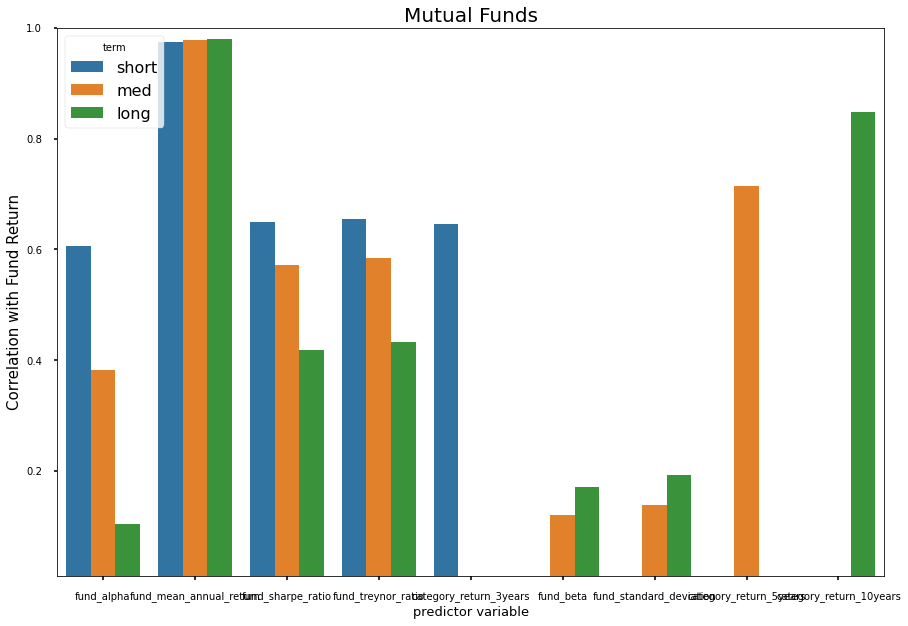

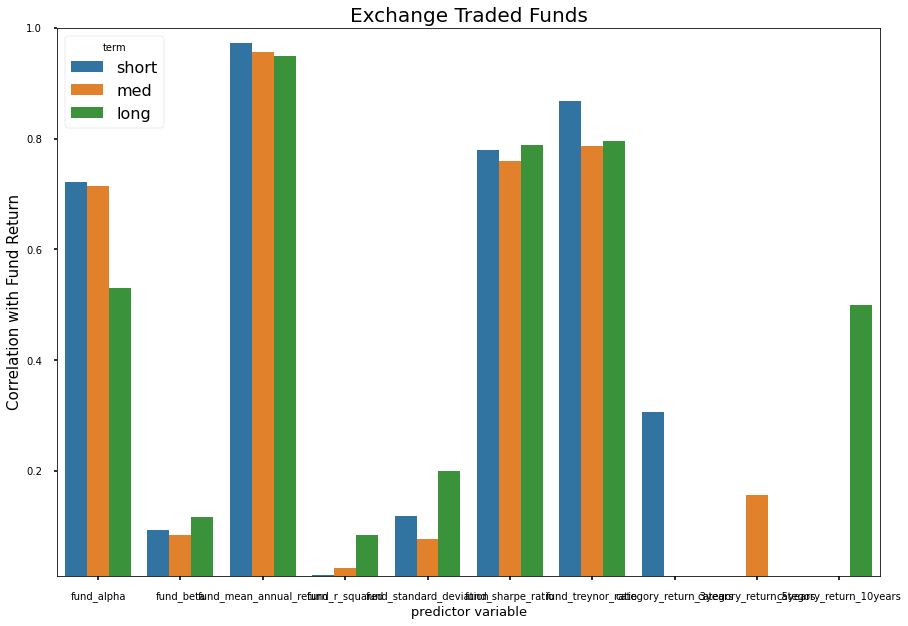

In [54]:
#Consolidating short, medium, long term dataframes into one encompassing dataframe 
mf_short_corrs2=mf_short_corrs.T.rename({'fund_alpha_3years':'fund_alpha','fund_beta_3years':'fund_beta','fund_mean_annual_return_3years':'fund_mean_annual_return','fund_r_squared_3years':'fund_r_squared','fund_standard_deviation_3years':'fund_standard_deviation','fund_sharpe_ratio_3years':'fund_sharpe_ratio','fund_treynor_ratio_3years':'fund_treynor_ratio',},axis='columns').T
etf_short_corrs2=etf_short_corrs.T.rename({'fund_alpha_3years':'fund_alpha','fund_beta_3years':'fund_beta','fund_mean_annual_return_3years':'fund_mean_annual_return','fund_r_squared_3years':'fund_r_squared','fund_standard_deviation_3years':'fund_standard_deviation','fund_sharpe_ratio_3years':'fund_sharpe_ratio','fund_treynor_ratio_3years':'fund_treynor_ratio'},axis='columns').T

mf_med_corrs2=mf_med_corrs.T.rename({'fund_alpha_5years':'fund_alpha','fund_beta_5years':'fund_beta','fund_mean_annual_return_5years':'fund_mean_annual_return','fund_r_squared_5years':'fund_r_squared','fund_standard_deviation_5years':'fund_standard_deviation','fund_sharpe_ratio_5years':'fund_sharpe_ratio','fund_treynor_ratio_5years':'fund_treynor_ratio'},axis='columns').T
etf_med_corrs2=etf_med_corrs.T.rename({'fund_alpha_5years':'fund_alpha','fund_beta_5years':'fund_beta','fund_mean_annual_return_5years':'fund_mean_annual_return','fund_r_squared_5years':'fund_r_squared','fund_standard_deviation_5years':'fund_standard_deviation','fund_sharpe_ratio_5years':'fund_sharpe_ratio','fund_treynor_ratio_5years':'fund_treynor_ratio'},axis='columns').T

mf_long_corrs2=mf_long_corrs.T.rename({'fund_alpha_10years':'fund_alpha','fund_beta_10years':'fund_beta','fund_mean_annual_return_10years':'fund_mean_annual_return','fund_r_squared_10years':'fund_r_squared','fund_standard_deviation_10years':'fund_standard_deviation','fund_sharpe_ratio_10years':'fund_sharpe_ratio','fund_treynor_ratio_10years':'fund_treynor_ratio'},axis='columns').T
etf_long_corrs2=etf_long_corrs.T.rename({'fund_alpha_10years':'fund_alpha','fund_beta_10years':'fund_beta','fund_mean_annual_return_10years':'fund_mean_annual_return','fund_r_squared_10years':'fund_r_squared','fund_standard_deviation_10years':'fund_standard_deviation','fund_sharpe_ratio_10years':'fund_sharpe_ratio','fund_treynor_ratio_10years':'fund_treynor_ratio' },axis='columns').T

mf_short_corrs2['term']='short'
etf_short_corrs2['term']='short'

mf_med_corrs2['term']='med'
etf_med_corrs2['term']='med'

mf_long_corrs2['term']='long'
etf_long_corrs2['term']='long'

etf_corrs=pd.concat([etf_short_corrs2,etf_med_corrs2,etf_long_corrs2])
mf_corrs=pd.concat([mf_short_corrs2,mf_med_corrs2,mf_long_corrs2])

mf_clean=mf_corrs[mf_corrs['correlation']>.10]
mf_plot=sns.barplot(x=mf_clean.index,y=mf_clean['correlation'],data=mf_clean,hue='term')
plt.tick_params(labelsize=10)
plt.title("Mutual Funds", fontsize = 20)
plt.xlabel("predictor variable", fontsize = 13)
plt.ylabel("Correlation with Fund Return", fontsize = 15)
mf_plot.set_ylim(.01, 1.0)
plt.tight_layout()
plt.show()

print('\n')
etf_clean=etf_corrs[etf_corrs['correlation']>.01]
etf_plot=sns.barplot(x=etf_clean.index,y=etf_clean['correlation'],data=etf_clean,hue='term')
plt.tick_params(labelsize=10)
plt.title("Exchange Traded Funds", fontsize = 20)
plt.xlabel("predictor variable", fontsize = 13)
plt.ylabel("Correlation with Fund Return", fontsize = 15)
etf_plot.set_ylim(.01, 1.0)
plt.tight_layout()
plt.show()

After performing this analysis, we noticed that the fund_mean_annual_return variable had a nearly perfect correlation with fund return. We realized though that this was because the variables are nearly identical in what they fundamentally are—they are both measures of fund return--, so it makes sense that their correlation was so high. With this In mind, we knew that going forward, it would not be useful to us in our calculations to use the fund_mean_annual_return to predict fund return because you are essentially using fund return to predict itself. When comparing ETFs and Mutual Funds, it seems that the Treynor and Sharpe ratios are more highly correlated with ETFs than Mutual Funds, while both still have a relatively high correlation with fund return. We found that as we increase the time frame, the predictive accuracy of our model decreases for Mutual Funds, but not for ETFs. This pattern was shown through comparing the different colors of bar graphs within each variable. Each color represents a different time period, so the fact that the bar graphs are decreasing (for Mutual Funds) as the time period is increasing shows that as time goes on, our predictive accuracy goes down. The alpha value has a very clear drop off, starting at approximately a .6 correlation in the short term and then dropping down to approximately .1 correlation in the long term. 

The overall conclusions that we have formulated from this analysis is that we are no longer going to proceed doing calculations with the fund_mean_annual_return as a predictor variable for fund return due to how similar the variables are. It is not logical to use one variable that is very similar to the outcome to then predict the outcome because it naturally will be a good predictor. The second part of our conclusions from this analysis is that  ETFs appear to be significantly easier to predict in the long term than Mutual Funds are. We learned this from the short, medium, and long term comparisons in the graph, and comparing these different  time periods. We can conclude from this that ETFs are a better option for a long-term investment than Mutual Funds.



In [55]:
#Dropping fund_mean_annual_return col
mf_short_corrs.drop(labels=['fund_mean_annual_return_3years'],axis=0,inplace=True)
etf_short_corrs.drop(labels=['fund_mean_annual_return_3years'],axis=0,inplace=True)

mf_med_corrs.drop(labels=['fund_mean_annual_return_5years'],axis=0,inplace=True)
etf_med_corrs.drop(labels=['fund_mean_annual_return_5years'],axis=0,inplace=True)

mf_long_corrs.drop(labels=['fund_mean_annual_return_10years'],axis=0,inplace=True)
etf_long_corrs.drop(labels=['fund_mean_annual_return_10years'],axis=0,inplace=True)

In this section we make our own composite variable of the fund descriptors that are highest correlated with fund returns for each of the three time frames short, medium, and long term. The composite variable is a weighted average of variables that are in our dataset. We then use a logistic regression utilizing test train split to predict if a fund will have above average fund returns based on the value of the composite variable.

Short-term score calculation:

In [56]:
mf_short_corrs=mf_short_corrs.sort_values(by=['correlation'],ascending=False)
etf_short_corrs=etf_short_corrs.sort_values(by=['correlation'],ascending=False)

mf_short_vars=mf_short_corrs.index[:3]
etf_short_vars=etf_short_corrs.index[:3]

mf_final['short_score']=0
etf_final['short_score']=0

for var in mf_short_vars:   
    mf_short_score=df_mf3[var]*(mf_short_corrs.loc[var,'correlation'])
    mf_final['short_score']+=mf_short_score
    #print(etf_score)
    
for var in etf_short_vars:   
    etf_short_score=df_etf3[var]*(etf_short_corrs.loc[var,'correlation'])
    etf_final['short_score']+=etf_short_score
    #print(etf_score)   

Medium-term score calculation:

In [57]:

mf_med_corrs=mf_med_corrs.sort_values(by=['correlation'],ascending=False)
etf_med_corrs=etf_med_corrs.sort_values(by=['correlation'],ascending=False)

mf_med_vars=mf_med_corrs.index[:3]
etf_med_vars=etf_med_corrs.index[:3]

mf_final['med_score']=0
etf_final['med_score']=0

for var in mf_med_vars:   
    mf_med_score=df_mf3[var]*(mf_med_corrs.loc[var,'correlation'])
    mf_final['med_score']+=mf_med_score
    #print(etf_score)
    
for var in etf_med_vars:   
    etf_med_score=df_etf3[var]*(etf_med_corrs.loc[var,'correlation'])
    etf_final['med_score']+=etf_med_score
    #print(etf_score)    

Long-term score calculation:

In [58]:
mf_long_corrs=mf_long_corrs.sort_values(by=['correlation'],ascending=False)
etf_long_corrs=etf_long_corrs.sort_values(by=['correlation'],ascending=False)

mf_long_vars=mf_long_corrs.index[:3]
etf_long_vars=etf_long_corrs.index[:3]

mf_final['long_score']=0
etf_final['long_score']=0

for var in mf_long_vars:   
    mf_long_score=df_mf3[var]*(mf_long_corrs.loc[var,'correlation'])
    mf_final['long_score']+=mf_long_score
    #print(etf_score)
    
for var in etf_long_vars:   
    etf_long_score=df_etf3[var]*(etf_long_corrs.loc[var,'correlation'])
    etf_final['long_score']+=etf_long_score
    #print(etf_score)    

Identifying funds with above average fund returns, 1 for an above average fund and a 0 for a below average fund 

In [59]:
greater_than(mf_final,'3years')
greater_than(etf_final,'3years')
greater_than(mf_final,'5years')
greater_than(etf_final,'5years')
greater_than(mf_final,'10years')
greater_than(etf_final,'10years')

Running the logistic regression function we wrote to predict above average fund return for __short term investments__

### Short Term

Predictors: ytd_score


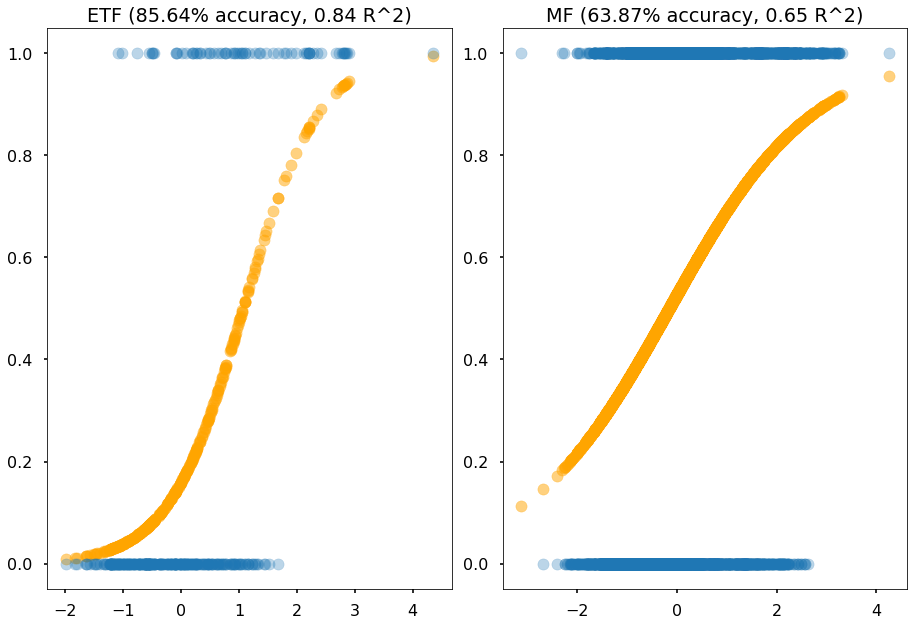

In [60]:
log_prob(etf_final,mf_final,'ytd_score','>average')

Running the logistic regression function we wrote to predict above average fund return for __Medium term investments__

### Medium Term

Predictors: med_score


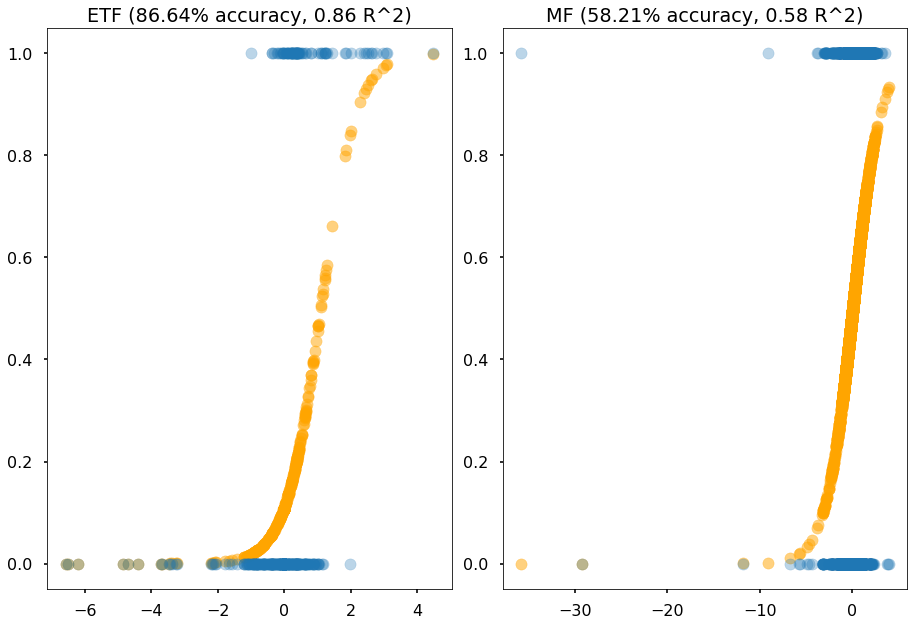

In [61]:
log_prob(etf_final,mf_final,'med_score','>average_5years')

Running the logistic regression function we wrote to predict above average fund return for __Long term investments__

### Long Term

Predictors: long_score


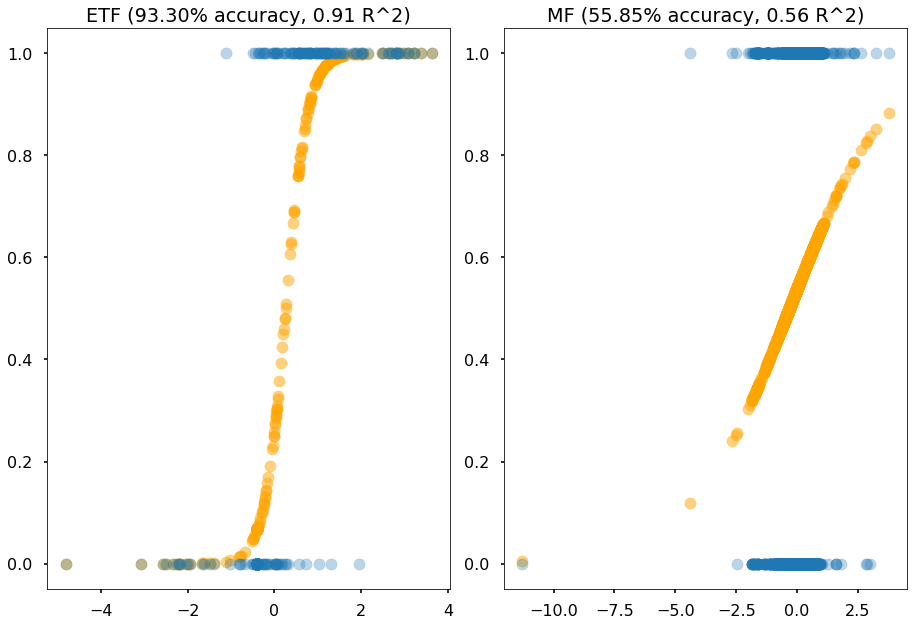

In [62]:
log_prob(etf_final,mf_final,'long_score','>average_10years')

This machine learning gives very suprising results. Using the descriptor funds available to investors the investor can identify ETFs with above average fund returns with accuracy between 75%-90%! The predictability of ETF funds significantly increases over time. The longer period of investment the investor can committ for the higher the predictive accuracy of wether a fund will have above average returns for ETF funds. For Mutual funds this pattern does not hold true. The predictability of Mutual Funds is not significantly better than random guessing for all time frames, and does not get more accurate as time passes. This supports the conclusions made in analysis of fund investment types that ETF value funds are the best long term investments. Using the desciptors of an ETF the investor can decide with over 90% (!) accuracy whether that fund will have above average fund returns in the long term, and considering that ETF value funds have higher yields than Mutual Fund value funds -- it is clear that ETF value funds are far superior to Mutual Fund value funds. As well as in the lomg term, the short and medium term  predictability of ETFs is significantly higher than that of mutual funds. Also supporting our prior conclusion that ETF growth funds are the ideal investments in the short and medium term.

Because the ETF is based off an index it allows for much easier predictability than Mutual Funds. The active management of Mutual Funds severly hurts the predicatibility of our model. The returns of a Mutual Fund is often too dependent on the decision makings of the fund manager, and no dataset in the world is complex enough to contain the various thoughts,gut feelings, and opinions of a fund manager. This added unpredictability of Mutual Funds was the downside of the fund type in this machine learning section and throughout the project.

### Chi-Square Test of Independence

The chi-square test of independence is a hypothesis test that is used to determine if there is a significant relationship between two categorical variables. The frequency of each category for one variable is compared across the category of the second variable in the form of a contingency table. In a contingency table, each row represnts a category of one variable and each column represents a category for the other variable. The chi-squared test for independence is looking to examine if there is a significant relationship between two variables-- to see if they are dependent or independent. 

In this case, we have two numeric variables. To start this test, our chi-squared test function converts these numeric values to categorical values. Once these values have been converted, the test then makes a contingency table out of the two variables, cross refrencing the frequencies of each  data pairs. For the final step, the function computes the chi-squared test for association. The test that we are computing below is a test to see if each of our six predictor variables for Mutual Funds and ETFs for each time frame are statistically significant. 

### __Test 1__

This chi-square test is testing the statistical significance of our score variable in the __short term (3 years)__ and seeing if there is a relationship between the score and the fund return in __Mutual Funds__.

In [75]:
#confidence interval 
year3 = []
for x in mf_short['fund_return_3years']:
    if 0/x == 0:
        year3.append(x)
        
lower = np.quantile(year3,.025)
upper = np.quantile(year3,.975)

print('The 95% confidence interval for fund_return_3years is '+str(lower)+' to '+str(upper))

The 95% confidence interval for fund_return_3years is -7.45 to 19.6625


In [76]:
chi_test(mf_final,mf_short,'short_score','fund_return_3years')

        0       1       2       3
0  1525.0  1413.0  1377.0  1400.0
1  1424.0  1483.0  1385.0  1420.0
2  1357.0  1352.0  1645.0  1345.0
3  1384.0  1448.0  1318.0  1546.0
This table shows us how many of each values are in each section of the overall ranges


p value is 0.009546107283670604
Because the p-value is less than the alpha value, we reject the null hypothesis.
We conclude that the alternate hypothesis is true and the two groups are dependent on one another.


This provides us with statistical evidence to conclude that we are 95% confident that this variable IS statistically significant


### __Test 2__

This chi-square test is testing the statistical significance of our score variable in the __short term (3 years)__ and seeing if there is a relationship between the score and the fund return in __ETFs__.

In [77]:
#confidence interval 
year3 = []
for x in etf_short['fund_return_3years']:
    if 0/x == 0:
        year3.append(x)
        
lower = np.quantile(year3,.025)
upper = np.quantile(year3,.975)

print('The 95% confidence interval for fund_return_3years is '+str(lower)+' to '+str(upper))

The 95% confidence interval for fund_return_3years is -16.578 to 20.928999999999995


In [78]:
chi_test(etf_final,etf_short,'short_score','fund_return_3years')

      0     1     2     3
0  62.0  58.0  67.0  58.0
1  69.0  61.0  47.0  55.0
2  61.0  70.0  68.0  72.0
3  55.0  58.0  64.0  63.0
This table shows us how many of each values are in each section of the overall ranges


p value is 0.6595734314632524
Because the p-value is greater than the alpha value, we cannot reject the null hypothesis.
We conclude that the null hypothesis is true and the two groups are independent of one another


This provides us with statistical evidence to conclude that we are 95% confident that this variable is NOT statistically significant


### __Test 3__

This chi-square test is testing the statistical significance of our score variable in the __medium term (5 years)__ and seeing if there is a relationship between the score and the fund return in __Mutual Funds__.

In [79]:
#confidence interval 
year5 = []
for x in mf_med['fund_return_5years']:
    if 0/x == 0:
        year5.append(x)
        
lower = np.quantile(year5,.025)
upper = np.quantile(year5,.975)

print('The 95% confidence interval for fund_return_5years is '+str(lower)+' to '+str(upper))

The 95% confidence interval for fund_return_5years is -2.34 to 17.65


In [80]:
chi_test(mf_final,mf_med,'med_score','fund_return_5years')

        0       1       2       3
0  1307.0  1261.0  1162.0  1275.0
1  1278.0  1284.0  1223.0  1205.0
2  1158.0  1211.0  1294.0  1293.0
3  1235.0  1224.0  1230.0  1230.0
This table shows us how many of each values are in each section of the overall ranges


p value is 0.01753010989307697
Because the p-value is less than the alpha value, we reject the null hypothesis.
We conclude that the alternate hypothesis is true and the two groups are dependent on one another.


This provides us with statistical evidence to conclude that we are 95% confident that this variable IS statistically significant


### __Test 4__

This chi-square test is testing the statistical significance of our score variable in the __medium term (5 years)__ and seeing if there is a relationship between the score and the fund return in __ETFs__.

In [81]:
#confidence interval 
year5 = []
for x in etf_med['fund_return_5years']:
    if 0/x == 0:
        year5.append(x)
        
lower = np.quantile(year5,.025)
upper = np.quantile(year5,.975)

print('The 95% confidence interval for fund_return_5years is '+str(lower)+' to '+str(upper))

The 95% confidence interval for fund_return_5years is -13.08225 to 21.82800000000001


In [82]:
chi_test(etf_final,etf_med,'med_score','fund_return_5years')

      0     1     2     3
0  49.0  49.0  56.0  43.0
1   9.0  16.0  10.0  10.0
2  96.0  90.0  82.0  93.0
3  44.0  42.0  51.0  52.0
This table shows us how many of each values are in each section of the overall ranges


p value is 1.0895736186189695e-16
Because the p-value is less than the alpha value, we reject the null hypothesis.
We conclude that the alternate hypothesis is true and the two groups are dependent on one another.


This provides us with statistical evidence to conclude that we are 95% confident that this variable IS statistically significant


### __Test 5__

This chi-square test is testing the statistical significance of our score variable in the __long term (10 years)__ and seeing if there is a relationship between the score and the fund return in __Mutual Funds__.

In [83]:
#confidence interval 
year10 = []
for x in mf_long['fund_return_10years']:
    if 0/x == 0:
        year10.append(x)
        
lower = np.quantile(year10,.025)
upper = np.quantile(year10,.975)

print('The 95% confidence interval for fund_return_3years is '+str(lower)+' to '+str(upper))

The 95% confidence interval for fund_return_3years is -0.4 to 16.07


In [84]:
chi_test(mf_final,mf_long,'long_score','fund_return_10years')

       0      1      2      3
0  712.0  728.0  794.0  808.0
1  752.0  783.0  752.0  771.0
2  766.0  775.0  737.0  727.0
3  789.0  703.0  749.0  686.0
This table shows us how many of each values are in each section of the overall ranges


p value is 0.24537290649072024
Because the p-value is greater than the alpha value, we cannot reject the null hypothesis.
We conclude that the null hypothesis is true and the two groups are independent of one another


This provides us with statistical evidence to conclude that we are 95% confident that this variable is NOT statistically significant


### __Test 6__

This chi-square test is testing the statistical significance of our score variable in the __long term (10 years)__ and seeing if there is a relationship between the score and the fund return in __ETFs__.

In [85]:
#confidence interval 
year10 = []
for x in etf_long['fund_return_10years']:
    if 0/x == 0:
        year10.append(x)
        
lower = np.quantile(year10,.025)
upper = np.quantile(year10,.975)

print('The 95% confidence interval for fund_return_3years is '+str(lower)+' to '+str(upper))

The 95% confidence interval for fund_return_3years is -8.8125 to 18.83125


In [86]:
chi_test(etf_final,etf_long,'long_score','fund_return_10years')

      0     1     2     3
0   8.0   7.0   8.0  12.0
1   0.0   0.0   0.0   0.0
2  84.0  88.0  84.0  76.0
3  15.0  11.0  13.0  20.0
This table shows us how many of each values are in each section of the overall ranges


p value is 4.238442737876829e-36
Because the p-value is less than the alpha value, we reject the null hypothesis.
We conclude that the alternate hypothesis is true and the two groups are dependent on one another.


This provides us with statistical evidence to conclude that we are 95% confident that this variable IS statistically significant


#### After performing these tests, the results were as follows:

Short Term Mutual Funds: 
- 	We are 95% confident that the score variable in the short term (3 years) for Mutual Funds is dependent on the 3 year fund return measure, and shows a relationship. This means that the score variable for short term Mutual Funds is significant. 

Short Term ETFs
- 	We are 95% confident that the score variable in the short term (3 years) for ETFs is dependent on the 3 year fund return measure, and shows a relationship. This means that the score variable for short term ETFs is significant.  

Medium Term Mutual Funds
- 	We are 95% confident that the score variable in the medium term (5 years) for Mutual Funds is independent of the 5 year fund return measure, and shows no relationship. This means that the score variable for medium term Mutual Funds is not significant. 

Medium Term ETFs 
- 	We are 95% confident that the score variable in the medium term (5 years) for ETFs is dependent on the 5 year fund return measure, and shows a relationship. This means that the score variable for medium term ETFs is significant.  

Long Term Mutual Funds
- 	We are 95% confident that the score variable in the long term (10 years) for Mutual Funds is independent of the 10 year fund return measure, and shows no relationship. This means that the score variable for long term Mutual Funds is not significant. 

Long Term ETFs
- 	We are 95% confident that the score variable in the long term (10 years) for ETFs is dependent on the 10 year fund return measure, and shows no relationship. This means that the score variable for long term ETFs is significant.  


These results were not surprising to us, and definitely showed a pattern that we expected. The conclusion that we came to after performing our time frame analysis on the fund returns and predictor variables was that ETFs are more easily predictable than the Mutual Funds are. The results of these chi-squared tests show that our predictor variables for ETFs predicting the success of a fund are all significant, while our predictor variables for Mutual Funds are not significant. This goes along with our previous conclusion and analysis that ETFs are far more predictable than Mutual Funds are. What we can gather from these results is that there are ways in which you can calculate the predictability of ETFs, which could make for a more sound investment over Mutual Funds. With the ability to predict the success, you have a good idea of how your money is being spent, and a general idea that you are making a good investment. On the other hand, with Mutual Funds, there is far less predictability when making an investment, so you are not as sure if your money will be well spent. When we formulated a predictor model in our analysis, the prediction accuracy for ETFs was at 86.98%, which is very high. This predictability is far greater than the Mutual Fund predictability, which was 65.90%. The way we calculated predictability was by determining whether or not a fund was above average, so there were two different outcomes. If you were to randomly guess if a fund was above average or not, your probability for making a sound investment would be 50%. Our prediction accuracy for Mutual Funds is only 65.90%, which is not much greater than if you were to simply guess. The ETF model is significantly greater than 50%, showing a significant difference when you predict a fund rather than simply guessing. These results go hand and hand with the results of the significance test. The fact that the Mutual Fund predictor variable is not significant coincides with the fact that we have a low prediction accuracy for Mutual Funds. The fact the ETF predictor variable is significant coincides with the fact that we have a high prediction accuracy for ETFs.  

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Conclusions:

Our analysis began through our exploratory analysis. We went through this analysis looking to compare ETFs to Mutual Funds—trying to see areas with notable similarities or differences. We used graphs to help visualize these comparisons and see which areas sparked our interest for deeper analysis. After exploring our data on a more basic level, we took it to the next level through our first analysis.
 
We started to analyze our data in depth first through the sector distributions within Mutual Funds and ETFs. We learned from these visualizations that sector investment has a generally weak and positive correlation with fund returns. The strongest correlation that we found only went up to a value of .3, which was still an overall small correlation, giving us little information. The area in which we found notable differences was the energy sector of ETFs and Mutual Funds. The ETF energy sector showed a weak correlation to the fund return, but the Mutual Fund energy sector showed no correlation at all. We made note that Mutual Funds invested more in technology, health care, and communication sectors while ETFs invested more in the basic materials sector. It came out to be that investment in any sector—except for technology—had essentially no correlation with the fund return. We came to the conclusion that there was no substantial evidence to say that the overall differences in fund return between Mutual Funds and ETFs could be attributed to a difference in investment sectors. This section helped us to make new conclusions about energy stocks overall, and how certain investors could look at Mutual Funds vs ETFs. Investors who are more interested in the energy sector and are looking to have this aspect of their portfolio should look to invest in ETFs instead of Mutual Funds. It seems that an investment in the energy sector of a Mutual Fund would generate no returns, which could be attributed to a variety of differences in the structure of Mutual Funds. Mutual Funds are more actively run, while ETFs are more passively run. The Mutual Funds have used their active management to pick poor investments in the energy sector over the last decade. This could be due to the fact the overwhelming success of energy stocks—Tesla, for example— has been downplayed and heavily shorted by fund managers, which would mean that companies are less inclined to choose to invest. This is a potential explanation as to why Mutual Funds don’t seem to generate as high returns from the energy sector as ETFs do.
 
In our next area of analysis, we were aiming to gain more information about the correlations that each of the different variables have with the ytd fund return. Once we generated these coefficients, we used them to create a composite variable. This score variable is composed of waded values for each of the variables based on their correlation coefficient. We then checked the accuracy of this variable using logistic regression for both Mutual Fund and ETFs to see if it accurately assessed whether or not a fund had above average fund returns. Within this logistic regression function, we also calculated the accuracy of our model, as well as the r-squared coefficient. Our findings show that ETFs tend to be a little more predictable in a one-year time period than Mutual Funds are. We suspect that this is because Mutual Funds employ an active management strategy, where ETFs simply follow an index and blindly proceed. After this analysis, we next analyzed how the predictive accuracy of ETFs and Mutual Funds varies across different time frames.
 
We aimed to examine a different aspect of funds based on the different time frames: investment strategy. We wanted to now look at the different investment strategies of Mutual Funds and ETFs across different time frames and see how the returns differ over different time frames. Once we plotted these graphs, the returns based on investment strategies were very apparent in the graphs. Based on these graphs, we concluded that for an investor who was looking to hold their fund position for a short period of time—less than one year-- , it is strongly recommended that they invest in growth ETF Funds. For the next time frame – 1 to 5 years—our graph shows that a growth ETF fund would still be the wise decision for a sound investment. After these time periods, once we got to 5 to 10 years, all of the graphs started to converge. For the long term, we found that the ETF value fund is the fund option with the highest return, but this was not as obvious as the shorter time periods. With the shorter time periods, there was a much bigger difference between the fund returns between each investment strategy, but as time went on, the fund returns started to converge for each strategy.
 
For our final analysis, we were looking to further analyze the difference between Mutual Funds and ETFs in the different time periods. This analysis took the predictor variable component that we performed and combined that with the time frame analysis concept that we also discovered in our analysis. Each of the variables that we have in our dataset have specific values for the different time periods, so we split them all up into their respective time periods and made three different predictor variables for each time period. Each of these scores waded the variable with the correlation to fund return to predict the success of a fund with a score. We then used a logistic regression to fit this model to find each of the prediction accuracies for the time periods of both Mutual Funds and ETFs. Overall, the ETFs were far more predictable, with prediction accuracies significantly higher than Mutual Funds. The prediction accuracies for Mutual Funds were very low, and not much more accurate than if you were to simply guess the success of a fund. To statistically prove whether these variables were statistically significant, we went through each of the six variables and ran a chi-squared test of independence to see if there truly was a relationship between these variables and the success of a fund—which we measure in terms of fund return. When we ran these tests, we got results that were not surprising to us. All of the ETF predictor variables for all of the time frames proved to be statistically significant on a 95% confidence interval, while the majority of the Mutual Fund variables proved not to be significant on the same 95% confidence interval. This coincides with what we have analyzed this entire time in the project by proving that ETFs are more predictable that Mutual Funds are. We specified the areas where ETFs were stronger than Mutual Funds throughout the project. Overall, more of the areas of this analysis gave us significant reason that we should invest in ETFs over mutual funds in certain situations. This analysis gave us very deep and thorough insight on the activities of ETFs and Mutual Funds, and the two compared to one another. These insights lead us to the conclusion that ETFs were a superior investment to Mutual Funds. The incredible predictability of ETFs gives them a large advantage over Mutual Funds, and the significant superiority of ETFs amongst growth funds and value funds makes them the clear better investment.


## *Data Description Continued:

### __MOTIVATION__

__Why was this dataset created?__
- These datasets were created to allow for multiple comparisons regarding portfolio decisions from investment managers in Mutual Funds and portfolio restrictions to the indexes in ETFs. The inspiration comes from the 2017 hype regarding ETFs, that convinced many investors to buy shares of Exchange Traded Funds rather than Mutual Funds.

__Who funded the creation of the dataset?__
- It is unclear who funded the creation of the dataset, but the data has been scraped from the publicly available website https://finance.yahoo.com.


### __COMPOSITION__

__What do the instances that comprise the dataset represent?__
- The instances that comprise the dataset represent fund symbols, asset stocks, asset bonds, net asset value (assets in the form of money), explained investment strategies, etc. 

__Are there any errors, sources of noise, or redundancies in the dataset?__
- There were errors in the dataset for ETFs which were empty columns. There were also some missing data values such as in the fund return columns. To account for this, we dropped the empty columns and the missing values as a way to clean the dataset with efficiency.

__Is the dataset self-contained, or does it link to or otherwise rely on external resources?__
- While the dataset is self-contained, the data was scraped from publicly available website https://finance.yahoo.com. The data is fully usable, meaning it is easy to understand and contains essential metadata, has rich, machine readable file formats and metadata, and there is assurance that the dataset is maintained. The license is CC0: Public Domain, meaning there are not any restrictions to a user. The creator of this dataset placed no copyrights or restrictions on it. 

__What are the observations (rows) and the attributes (columns)?__
- Columns (ETF):
    - Fund_symbol: A ticker symbol or stock symbol is an abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market. A stock symbol may consist of letters, numbers or a combination of both.
    - Fund_extended_name: The full name of the fund that is given to us by their fund symbol 
Fund_family: A fund family includes all the separate funds managed by a single investment company. 
    - Inception_date: The date on which the fund began its operations. 
    - Category: A fund category is a way of differentiating mutual funds according to their investment objectives and principal investment features. This categorization allows investors to spread their money around in a mix of funds with a variety of risk and return characteristics.
    - Investment_strategy: An investment strategy is what guides an investor's decisions based on goals, risk tolerance, and future needs for capital. Some investment strategies seek rapid growth where an investor focuses on capital appreciation, or they can follow a low-risk strategy where the focus is on wealth protection.
    - Investment_type: One of three investment types. 
        - Growth Fund: a mutual fund that invests primarily in stocks that are expected to increase in capital value rather than yield high income.
        - Value Fund: A value fund follows a policy that focuses on investing in stocks based on fundamental characteristics that are undervalued in quality. Quality fund managers are looking for shares that are valued below their actual value for different reasons.
        - Blend Fund: Blend funds, which contain only stocks and no fixed-income securities, are a type of equity fund that holds a mix of both growth stock and value stock.
    - Size_type: Size of the fund 
    - Currency: Currency that the fund uses 
    - Fund_net_annual_expense_ratio: The net expense ratio is what fund shareholders pay to be invested in the fund after fee waivers or reimbursements.
    - Category_net_annual_expense_ratio: The same thing as a fund net annual expense ratio but with regards to the category rather than the fund 
    - Asset_stocks: percentage of stocks in the fund portfolio
    - Asset_bonds: percentage of bonds in the fund portfolio 
    - Price_earnings_ratio: The price-earnings ratio, also known as P/E ratio, P/E, or PER, is the ratio of a company's share price to the company's earnings per share. The ratio is used for valuing companies and to find out whether they are overvalued or undervalued
    - Price_book_ratio: The price-to-book ratio, or P/B ratio, is a financial ratio used to compare a company's current market value to its book value.
    - Price_sales_ratio: Price–sales ratio, P/S ratio, or PSR, is a valuation metric for stocks. It is calculated by dividing the company's market capitalization by the revenue in the most recent year; or, equivalently, divide the per-share stock price by the per-share revenue.
    - Price_cashflow_ratio: The price/cash flow ratio, is a ratio used to compare a company's market value to its cash flow.
    - Sector_basic_materials: percentage of portfolio securities that belong to the basic materials sector
    - Sector_consumer_cyclical: percentage of portfolio securities that belong to the consumer cyclical sector
    - Sector_financial_services: percentage of portfolio securities that belong to the financial services sector
    - Sector_real_estate: percentage of portfolio securities that belong to the real estate sector
    - Sector_consumer_defensive: percentage of portfolio securities that belong to the consumer defensive sector
    - Sector_healthcare: percentage of portfolio securities that belong to the healthcare sector
    - Sector_utilities: percentage of portfolio securities that belong to the utilities sector
    - Sector_communication_services: percentage of portfolio securities that belong to the communication services sector
    - Sector_energy: percentage of portfolio securities that belong to the energy sector
    - Sector_industrials: percentage of portfolio securities that belong to the industrials sector
    - Sector_technology: percentage of portfolio securities that belong to the technology sector
    - Credit_us_government: percentage of US government bonds in the fund portfolio
    - Credit_aaa: percentage of AAA bonds in the fund portfolio. A Triple-A (AAA) bond rating is the highest rating bond agencies award to an investment considered to have a low risk of default, thereby making it the most creditworthy.
    - Credit_aa: percentage of AA bonds in the fund portfolio. AA is considered to be a high grade for a bond, but not quite a prime grade (that would be AAA). While a AAA rating means that a bond has "virtually" no chance of default, a AA rating means that there is a "low" chance of a default.
    - Credit_a: percentage of A bonds in the fund portfolio.  "A" (medium credit quality) is considered investment grade.
    - Credit_bbb: percentage of BBB bonds in the fund portfolio.  "BBB" (medium credit quality) is considered investment grade.
    - Credit_bb: percentage of BB bonds in the fund portfolio. A BB rating is below investment-grade or sometimes referred to as high-yield or junk.
    - Credit_b: Percentage of B bonds in the fund portfolio. “B” rankings are considered low credit quality, and are commonly referred to as "junk bonds."
    - Credit_below_b: percentage of bonds with rating below B in the fund portfolio. Credit ratings for bonds below “B” are considered low credit quality, and are commonly referred to as "junk bonds."
    - Credit_other_ratings: percentage of bonds with other ratings in the fund portfolio. 
    - Net_asset_value: the value of a mutual fund that is reached by deducting the fund's liabilities from the market value of all of its shares and then dividing by the number of issued shares.
    - Fund_yield: income returned to its investors through interest and dividends generated by the fund's investments. 
    - Top10_holdings: security names and portfolio allocations of the top 10 fund holdings. 
    - Fund_return_ytd: the money made or lost on an investment by the fund over some period of time (in this case the year to date). 
    - Category_return_ytd: the money made or lost on an investment by the category over some period of time (in this case the year to date). 
    - Fund_return_1month: the money made or lost on an investment by the fund over the period of one month.
    - Category_return_1month: the money made or lost on an investment by the category over the period of one month. 
    - Fund_return_3months: the money made or lost on an investment by the fund over the period of three months. 
    - Category_return_3months: the money made or lost on an investment by the category over the period of three months. 
    - Fund_return_1year: the money made or lost on an investment by the fund over the period of one year. 
    - Category_return_1year: the money made or lost on an investment by the category over the period of one year. 
    - Fund_return_3years: the money made or lost on an investment by the fund over the period of three years. 
    - Category_return_3years: the money made or lost on an investment by the category over the period of three years. 
    - Fund_return_5years: the money made or lost on an investment by the fund over the period of five years. 
    - Category_return_5year: the money made or lost on an investment by the category over the period of five years. 
    - Fund_return_10years: the money made or lost on an investment by the fund over the period of ten years. 
    - Category_return_10years: the money made or lost on an investment by the category over the period of ten years. 
    - Fund_return_2019: the money made or lost on an investment by the fund in 2019. 
    - Category_return_2019: the money made or lost on an investment by the category in 2019. 
    - Fund_return_2018: the money made or lost on an investment by the fund in 2019. 
    - Category_return_2018: the money made or lost on an investment by the category in 2018. 
    - Fund_return_2017: the money made or lost on an investment by the fund in 2017. 
    - Category_return_2017: the money made or lost on an investment by the category in 2017. 
    - Fund_return_2016: the money made or lost on an investment by the fund in 2016. 
    - Category_return_2016: the money made or lost on an investment by the category in 2016. 
    - Fund_return_2015: the money made or lost on an investment by the fund in 2015. 
    - Category_return_2015: the money made or lost on an investment by the category in 2015. 
    - Fund_return_2014: the money made or lost on an investment by the fund in 2014. 
    - Category_return_2014: the money made or lost on an investment by the category in 2014. 
    - Fund_return_2013: the money made or lost on an investment by the fund in 2013. 
    - Category_return_2013: the money made or lost on an investment by the category in 2013. 
    - Fund_return_2012: the money made or lost on an investment by the fund in 2012. 
    - Category_return_2012: the money made or lost on an investment by the category in 2012. 
    - Fund_return_2011: the money made or lost on an investment by the fund in 2011. 
    - Category_return_2011: the money made or lost on an investment by the category in 2011. 
    - Fund_return_2010: the money made or lost on an investment by the fund in 2010. 
    - Category_return_2010: the money made or lost on an investment by the category in 2010. 
    - Years_up: years with positive fund returns
    - Years_down: years with negative fund returns
    - Fund_alpha_3years: A three year measure of a funds investment's performance on a risk-adjusted basis. (Simply stated, alpha is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return.) 
    - Category_alpha_3years: A three year measure of a category’s investment's performance on a risk-adjusted basis. (Simply stated, alpha is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return.) 
    - Fund_alpha_5years: A five year measure of a fund’s investment's performance on a risk-adjusted basis. (Simply stated, alpha is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return.) 
    - Category_alpha_5years: A five year measure of a category’s investment's performance on a risk-adjusted basis. (Simply stated, alpha is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return.) 
    - Fund_alpha_10years: A ten year measure of a fund’s investment's performance on a risk-adjusted basis. (Simply stated, alpha is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return.) 
    - Category_alpha_10years: A ten year measure of a category’s investment's performance on a risk-adjusted basis. (Simply stated, alpha is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return.) 
    - Fund_beta_3years: A measure of how volatile an investor can expect the fund to be over three years compared to the overall market. A beta of more than one means that the fund is more volatile than the overall market, and a beta of less than one means that it is less volatile.
    - Category_beta_3years: A measure of how volatile an investor can expect the category to be over three years compared to the overall market. A beta of more than one means that the fund is more volatile than the overall market, and a beta of less than one means that it is less volatile.
    - Fund_beta_5years: A measure of how volatile an investor can expect the fund to be over five years compared to the overall market. A beta of more than one means that the fund is more volatile than the overall market, and a beta of less than one means that it is less volatile.
    - Category_beta_5years: A measure of how volatile an investor can expect the category to be over five years compared to the overall market. A beta of more than one means that the fund is more volatile than the overall market, and a beta of less than one means that it is less volatile.
    - Fund_beta_10years: A measure of how volatile an investor can expect the fund to be over ten years compared to the overall market. A beta of more than one means that the fund is more volatile than the overall market, and a beta of less than one means that it is less volatile.
    - Category_beta_10years: A measure of how volatile an investor can expect the category to be over ten years compared to the overall market. A beta of more than one means that the fund is more volatile than the overall market, and a beta of less than one means that it is less volatile.
    - Fund_mean_annual_return_3years: The yearly average amount of money made or lost on an investment by the fund over the period of three years. 
    - Category_mean_annual_return_3years: The yearly average amount of money made or lost on an investment by the category over the period of three years. 
    - Fund_mean_annual_return_5years: The yearly average amount of money made or lost on an investment by the fund over the period of five years. 
    - Category_mean_annual_return_5years: The yearly average amount of money made or lost on an investment by the category over the period of five years. 
    - Fund_mean_annual_return_10years: The yearly average amount of money made or lost on an investment by the fund over the period of ten years. 
    - Category_mean_annual_return_10years: The yearly average amount of money made or lost on an investment by the category over the period of ten years. 
    - Fund_r_squared_3years: A measure of the percentage of a fund's performance as a result of a benchmark over the period of three years. Fund managers use a benchmark to evaluate the performance of a mutual fund.
    - Category_r_squared_3years: A measure of the percentage of a category’s performance as a result of a benchmark over the period of three years. Fund managers use a benchmark to evaluate the performance of a mutual fund.
    - Fund_r_squared_5years: A measure of the percentage of a fund's performance as a result of a benchmark over the period of five years. Fund managers use a benchmark to evaluate the performance of a mutual fund.
    - Category_r_squared_5years: A measure of the percentage of a category’s performance as a result of a benchmark over the period of five years. Fund managers use a benchmark to evaluate the performance of a mutual fund.
    - Fund_r_squared_10years: A measure of the percentage of a fund's performance as a result of a benchmark over the period of ten years. Fund managers use a benchmark to evaluate the performance of a mutual fund.
    - Category_r_squared_10years: A measure of the percentage of a category’s  performance as a result of a benchmark over the period of ten years. Fund managers use a benchmark to evaluate the performance of a mutual fund.
    - Fund_standard_deviation_3years: A measure that tells us how much the return on a fund is deviating over a three year period from the expected returns based on its historical performance. 
    - Category_standard_deviation_3years: A measure that tells us how much the return on a category is deviating over a three year period from the expected returns based on its historical performance. 
    - Fund_standard_deviation_5years: A measure that tells us how much the return on a fund is deviating over a five year period from the expected returns based on its historical performance. 
    - Category_standard_deviation_5years: A measure that tells us how much the return on a category is deviating over a five year period from the expected returns based on its historical performance. 
    - Fund_standard_deviation_10years: A measure that tells us how much the return on a fund is deviating over a ten year period from the expected returns based on its historical performance. 
    - Category_standard_deviation_10years: A measure that tells us how much the return on a category is deviating over a ten year period from the expected returns based on its historical performance. 
    - Fund_sharpe_ratio_3years: A measure of the performance of a fund’s investment compared to a risk-free asset, after adjusting for its risk over a three year period. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
    - Category_sharpe_ratio_3years: A measure of the performance of a category’s investment compared to a risk-free asset, after adjusting for its risk over a three year period. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
    - Fund_sharpe_ratio_5years: A measure of the performance of a fund’s investment compared to a risk-free asset, after adjusting for its risk over a five year period. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
    - Category_sharpe_ratio_5years: A measure of the performance of a category’s investment compared to a risk-free asset, after adjusting for its risk over a five year period. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
    - Fund_sharpe_ratio_10years: A measure of the performance of a fund’s investment compared to a risk-free asset, after adjusting for its risk over a ten year period. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
    - Category_sharpe_ratio_10years: A measure of the performance of a category’s investment compared to a risk-free asset, after adjusting for its risk over a ten year period. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
    - Fund_treynor_ratio_3years: A measure of the returns earned by a fund more than the risk-free return at a given level of market risk over a three year period. It highlights the risk-adjusted profits generated by a mutual fund scheme.
    - Category_treynor_ratio_3years: A measure of the returns earned by a category more than the risk-free return at a given level of market risk over a three year period. It highlights the risk-adjusted profits generated by a mutual fund scheme.
    - Fund_treynor_ratio_5years: A measure of the returns earned by a fund more than the risk-free return at a given level of market risk over a five year period. It highlights the risk-adjusted profits generated by a mutual fund scheme.
    - Category_treynor_ratio_5years: A measure of the returns earned by a category more than the risk-free return at a given level of market risk over a five year period. It highlights the risk-adjusted profits generated by a mutual fund scheme.
    - Fund_treynor_ratio_10years: A measure of the returns earned by a fund more than the risk-free return at a given level of market risk over a ten year period. It highlights the risk-adjusted profits generated by a mutual fund scheme.
    - Category_treynor_ratio_10years: A measure of the returns earned by a category more than the risk-free return at a given level of market risk over a ten year period. It highlights the risk-adjusted profits generated by a mutual fund scheme.
    
- Rows (ETF):
    - Each row represents the information that is described in each column for the distinct fund


- Columns (Mutual Funds):
    - Fund_symbol: A ticker symbol or stock symbol is an abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market. A stock symbol may consist of letters, numbers or a combination of both.
    - Fund_extended_name: The full name of the fund that is given to us by their fund symbol 
Fund_family: A fund family includes all the separate funds managed by a single investment company. 
    - Inception_date: The date on which the fund began its operations. 
    - Category: A fund category is a way of differentiating mutual funds according to their investment objectives and principal investment features. This categorization allows investors to spread their money around in a mix of funds with a variety of risk and return characteristics.
    - Investment_strategy: An investment strategy is what guides an investor's decisions based on goals, risk tolerance, and future needs for capital. Some investment strategies seek rapid growth where an investor focuses on capital appreciation, or they can follow a low-risk strategy where the focus is on wealth protection.
    - Investment_type: One of three investment types. 
        - Growth Fund: a mutual fund that invests primarily in stocks that are expected to increase in capital value rather than yield high income.
        - Value Fund: A value fund follows a policy that focuses on investing in stocks based on fundamental characteristics that are undervalued in quality. Quality fund managers are looking for shares that are valued below their actual value for different reasons.
        - Blend Fund: Blend funds, which contain only stocks and no fixed-income securities, are a type of equity fund that holds a mix of both growth stock and value stock.
    - Size_type: Size of the fund 
    - Currency: Currency that the fund uses 
    - Fund_net_annual_expense_ratio: The net expense ratio is what fund shareholders pay to be invested in the fund after fee waivers or reimbursements.
    - Category_net_annual_expense_ratio: The same thing as a fund net annual expense ratio but with regards to the category rather than the fund 
    - Asset_stocks: percentage of stocks in the fund portfolio
    - Asset_bonds: percentage of bonds in the fund portfolio 
    - Price_earnings_ratio: The price-earnings ratio, also known as P/E ratio, P/E, or PER, is the ratio of a company's share price to the company's earnings per share. The ratio is used for valuing companies and to find out whether they are overvalued or undervalued
    - Price_book_ratio: The price-to-book ratio, or P/B ratio, is a financial ratio used to compare a company's current market value to its book value.
    - Price_sales_ratio: Price–sales ratio, P/S ratio, or PSR, is a valuation metric for stocks. It is calculated by dividing the company's market capitalization by the revenue in the most recent year; or, equivalently, divide the per-share stock price by the per-share revenue.
    - Price_cashflow_ratio: The price/cash flow ratio, is a ratio used to compare a company's market value to its cash flow.
    - Sector_basic_materials: percentage of portfolio securities that belong to the basic materials sector
    - Sector_consumer_cyclical: percentage of portfolio securities that belong to the consumer cyclical sector
    - Sector_financial_services: percentage of portfolio securities that belong to the financial services sector
    - Sector_real_estate: percentage of portfolio securities that belong to the real estate sector
    - Sector_consumer_defensive: percentage of portfolio securities that belong to the consumer defensive sector
    - Sector_healthcare: percentage of portfolio securities that belong to the healthcare sector
    - Sector_utilities: percentage of portfolio securities that belong to the utilities sector
    - Sector_communication_services: percentage of portfolio securities that belong to the communication services sector
    - Sector_energy: percentage of portfolio securities that belong to the energy sector
    - Sector_industrials: percentage of portfolio securities that belong to the industrials sector
    - Sector_technology: percentage of portfolio securities that belong to the technology sector
    - Credit_us_government: percentage of US government bonds in the fund portfolio
    - Credit_aaa: percentage of AAA bonds in the fund portfolio. A Triple-A (AAA) bond rating is the highest rating bond agencies award to an investment considered to have a low risk of default, thereby making it the most creditworthy.
    - Credit_aa: percentage of AA bonds in the fund portfolio. AA is considered to be a high grade for a bond, but not quite a prime grade (that would be AAA). While a AAA rating means that a bond has "virtually" no chance of default, a AA rating means that there is a "low" chance of a default.
    - Credit_a: percentage of A bonds in the fund portfolio.  "A" (medium credit quality) is considered investment grade.
    - Credit_bbb: percentage of BBB bonds in the fund portfolio.  "BBB" (medium credit quality) is considered investment grade.
    - Credit_bb: percentage of BB bonds in the fund portfolio. A BB rating is below investment-grade or sometimes referred to as high-yield or junk.
    - Credit_b: Percentage of B bonds in the fund portfolio. “B” rankings are considered low credit quality, and are commonly referred to as "junk bonds."
    - Credit_below_b: percentage of bonds with rating below B in the fund portfolio. Credit ratings for bonds below “B” are considered low credit quality, and are commonly referred to as "junk bonds."
    - Credit_other_ratings: percentage of bonds with other ratings in the fund portfolio. 
    - Net_asset_value: the value of a mutual fund that is reached by deducting the fund's liabilities from the market value of all of its shares and then dividing by the number of issued shares.
    - Fund_yield: income returned to its investors through interest and dividends generated by the fund's investments. 
    - Top10_holdings: security names and portfolio allocations of the top 10 fund holdings. 
    - Fund_return_ytd: the money made or lost on an investment by the fund over some period of time (in this case the year to date). 
    - Category_return_ytd: the money made or lost on an investment by the category over some period of time (in this case the year to date). 
    - Fund_return_1month: the money made or lost on an investment by the fund over the period of one month.
    - Category_return_1month: the money made or lost on an investment by the category over the period of one month. 
    - Fund_return_3months: the money made or lost on an investment by the fund over the period of three months. 
    - Category_return_3months: the money made or lost on an investment by the category over the period of three months. 
    - Fund_return_1year: the money made or lost on an investment by the fund over the period of one year. 
    - Category_return_1year: the money made or lost on an investment by the category over the period of one year. 
    - Fund_return_3years: the money made or lost on an investment by the fund over the period of three years. 
    - Category_return_3years: the money made or lost on an investment by the category over the period of three years. 
    - Fund_return_5years: the money made or lost on an investment by the fund over the period of five years. 
    - Category_return_5year: the money made or lost on an investment by the category over the period of five years. 
    - Fund_return_10years: the money made or lost on an investment by the fund over the period of ten years. 
    - Category_return_10years: the money made or lost on an investment by the category over the period of ten years. 
    - Fund_return_2019: the money made or lost on an investment by the fund in 2019. 
    - Category_return_2019: the money made or lost on an investment by the category in 2019. 
    - Fund_return_2018: the money made or lost on an investment by the fund in 2019. 
    - Category_return_2018: the money made or lost on an investment by the category in 2018. 
    - Fund_return_2017: the money made or lost on an investment by the fund in 2017. 
    - Category_return_2017: the money made or lost on an investment by the category in 2017. 
    - Fund_return_2016: the money made or lost on an investment by the fund in 2016. 
    - Category_return_2016: the money made or lost on an investment by the category in 2016. 
    - Fund_return_2015: the money made or lost on an investment by the fund in 2015. 
    - Category_return_2015: the money made or lost on an investment by the category in 2015. 
    - Fund_return_2014: the money made or lost on an investment by the fund in 2014. 
    - Category_return_2014: the money made or lost on an investment by the category in 2014. 
    - Fund_return_2013: the money made or lost on an investment by the fund in 2013. 
    - Category_return_2013: the money made or lost on an investment by the category in 2013. 
    - Fund_return_2012: the money made or lost on an investment by the fund in 2012. 
    - Category_return_2012: the money made or lost on an investment by the category in 2012. 
    - Fund_return_2011: the money made or lost on an investment by the fund in 2011. 
    - Category_return_2011: the money made or lost on an investment by the category in 2011. 
    - Fund_return_2010: the money made or lost on an investment by the fund in 2010. 
    - Category_return_2010: the money made or lost on an investment by the category in 2010. 
    - Years_up: years with positive fund returns
    - Years_down: years with negative fund returns
    - Fund_alpha_3years: A three year measure of a funds investment's performance on a risk-adjusted basis. (Simply stated, alpha is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return.) 
    - Category_alpha_3years: A three year measure of a category’s investment's performance on a risk-adjusted basis. (Simply stated, alpha is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return.) 
    - Fund_alpha_5years: A five year measure of a fund’s investment's performance on a risk-adjusted basis. (Simply stated, alpha is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return.) 
    - Category_alpha_5years: A five year measure of a category’s investment's performance on a risk-adjusted basis. (Simply stated, alpha is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return.) 
    - Fund_alpha_10years: A ten year measure of a fund’s investment's performance on a risk-adjusted basis. (Simply stated, alpha is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return.) 
    - Category_alpha_10years: A ten year measure of a category’s investment's performance on a risk-adjusted basis. (Simply stated, alpha is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return.) 
    - Fund_beta_3years: A measure of how volatile an investor can expect the fund to be over three years compared to the overall market. A beta of more than one means that the fund is more volatile than the overall market, and a beta of less than one means that it is less volatile.
    - Category_beta_3years: A measure of how volatile an investor can expect the category to be over three years compared to the overall market. A beta of more than one means that the fund is more volatile than the overall market, and a beta of less than one means that it is less volatile.
    - Fund_beta_5years: A measure of how volatile an investor can expect the fund to be over five years compared to the overall market. A beta of more than one means that the fund is more volatile than the overall market, and a beta of less than one means that it is less volatile.
    - Category_beta_5years: A measure of how volatile an investor can expect the category to be over five years compared to the overall market. A beta of more than one means that the fund is more volatile than the overall market, and a beta of less than one means that it is less volatile.
    - Fund_beta_10years: A measure of how volatile an investor can expect the fund to be over ten years compared to the overall market. A beta of more than one means that the fund is more volatile than the overall market, and a beta of less than one means that it is less volatile.
    - Category_beta_10years: A measure of how volatile an investor can expect the category to be over ten years compared to the overall market. A beta of more than one means that the fund is more volatile than the overall market, and a beta of less than one means that it is less volatile.
    - Fund_mean_annual_return_3years: The yearly average amount of money made or lost on an investment by the fund over the period of three years. 
    - Category_mean_annual_return_3years: The yearly average amount of money made or lost on an investment by the category over the period of three years. 
    - Fund_mean_annual_return_5years: The yearly average amount of money made or lost on an investment by the fund over the period of five years. 
    - Category_mean_annual_return_5years: The yearly average amount of money made or lost on an investment by the category over the period of five years. 
    - Fund_mean_annual_return_10years: The yearly average amount of money made or lost on an investment by the fund over the period of ten years. 
    - Category_mean_annual_return_10years: The yearly average amount of money made or lost on an investment by the category over the period of ten years. 
    - Fund_r_squared_3years: A measure of the percentage of a fund's performance as a result of a benchmark over the period of three years. Fund managers use a benchmark to evaluate the performance of a mutual fund.
    - Category_r_squared_3years: A measure of the percentage of a category’s performance as a result of a benchmark over the period of three years. Fund managers use a benchmark to evaluate the performance of a mutual fund.
    - Fund_r_squared_5years: A measure of the percentage of a fund's performance as a result of a benchmark over the period of five years. Fund managers use a benchmark to evaluate the performance of a mutual fund.
    - Category_r_squared_5years: A measure of the percentage of a category’s performance as a result of a benchmark over the period of five years. Fund managers use a benchmark to evaluate the performance of a mutual fund.
    - Fund_r_squared_10years: A measure of the percentage of a fund's performance as a result of a benchmark over the period of ten years. Fund managers use a benchmark to evaluate the performance of a mutual fund.
    - Category_r_squared_10years: A measure of the percentage of a category’s  performance as a result of a benchmark over the period of ten years. Fund managers use a benchmark to evaluate the performance of a mutual fund.
    - Fund_standard_deviation_3years: A measure that tells us how much the return on a fund is deviating over a three year period from the expected returns based on its historical performance. 
    - Category_standard_deviation_3years: A measure that tells us how much the return on a category is deviating over a three year period from the expected returns based on its historical performance. 
    - Fund_standard_deviation_5years: A measure that tells us how much the return on a fund is deviating over a five year period from the expected returns based on its historical performance. 
    - Category_standard_deviation_5years: A measure that tells us how much the return on a category is deviating over a five year period from the expected returns based on its historical performance. 
    - Fund_standard_deviation_10years: A measure that tells us how much the return on a fund is deviating over a ten year period from the expected returns based on its historical performance. 
    - Category_standard_deviation_10years: A measure that tells us how much the return on a category is deviating over a ten year period from the expected returns based on its historical performance. 
    - Fund_sharpe_ratio_3years: A measure of the performance of a fund’s investment compared to a risk-free asset, after adjusting for its risk over a three year period. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
    - Category_sharpe_ratio_3years: A measure of the performance of a category’s investment compared to a risk-free asset, after adjusting for its risk over a three year period. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
    - Fund_sharpe_ratio_5years: A measure of the performance of a fund’s investment compared to a risk-free asset, after adjusting for its risk over a five year period. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
    - Category_sharpe_ratio_5years: A measure of the performance of a category’s investment compared to a risk-free asset, after adjusting for its risk over a five year period. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
    - Fund_sharpe_ratio_10years: A measure of the performance of a fund’s investment compared to a risk-free asset, after adjusting for its risk over a ten year period. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
    - Category_sharpe_ratio_10years: A measure of the performance of a category’s investment compared to a risk-free asset, after adjusting for its risk over a ten year period. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
    - Fund_treynor_ratio_3years: A measure of the returns earned by a fund more than the risk-free return at a given level of market risk over a three year period. It highlights the risk-adjusted profits generated by a mutual fund scheme.
    - Category_treynor_ratio_3years: A measure of the returns earned by a category more than the risk-free return at a given level of market risk over a three year period. It highlights the risk-adjusted profits generated by a mutual fund scheme.
    - Fund_treynor_ratio_5years: A measure of the returns earned by a fund more than the risk-free return at a given level of market risk over a five year period. It highlights the risk-adjusted profits generated by a mutual fund scheme.
    - Category_treynor_ratio_5years: A measure of the returns earned by a category more than the risk-free return at a given level of market risk over a five year period. It highlights the risk-adjusted profits generated by a mutual fund scheme.
    - Fund_treynor_ratio_10years: A measure of the returns earned by a fund more than the risk-free return at a given level of market risk over a ten year period. It highlights the risk-adjusted profits generated by a mutual fund scheme.
    - Category_treynor_ratio_10years: A measure of the returns earned by a category more than the risk-free return at a given level of market risk over a ten year period. It highlights the risk-adjusted profits generated by a mutual fund scheme.



- Rows (Mutual Funds):
    - Each row represents the information that is described in each column for the distinct fund



### __COLLECTION PROCESS__

__What processes might have influenced what data was observed and recorded and what was not?__
- The data that is in the dataset was collected from the public website of Yahoo Finance. The fact that this is a public site might have influenced what data was observed and recorded because it is data that is readily available, as opposed to medical data which is harder to obtain/is usually private. Furthermore, the which data was observed or collected was possibly influenced by its ability to allow comparisons regarding portfolio decisions. Lastly, data was collected on specific financial instruments like ETFs and mutual funds, so data on another financial instrument like municipal bonds would’ve been ignored.

__Over what time frame was the data collected?__
- The timeframe of the data contains stock returns up to date to November of 2020. The data provides a stronger answer to the broader question of ETF success now.

__How was the data associated with each instance acquired?__
- The data was directly observable- rates, prices, text, etc. This data was scraped from Morningstar through Yahoo Finance. The job of Morningstar is to provide financial ratios, market capitalization, and outstanding shares through real time data.

__What preprocessing was done, and how did the data come to be in the form that you are using?__
- Data was scraped from the public website https://finance.yahoo.com to make the original dataset. We broke up the ETF dataset into separate dataframes to make it easier to work with. For example, we made a dataframe just for the standard deviations of the funds. We also made a dataframe just for different fund ratios, such as the price earnings ratio and the price book ratio. We cleaned by key words in order to make each individual dataframe have a purpose. We dropped empty columns/values as well.
